In [1]:
#All Libraries used in the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
#Reading the data from the csv files
hour3 = pd.read_csv('1_6pm - 9pm.csv')
hour6 = pd.read_csv('2_9pm - 12am.csv')
hour9 = pd.read_csv('3_12am - 3am.csv')
hour12 = pd.read_csv('4_3am - 6am.csv')
hour15 = pd.read_csv('5_6am - 9am.csv')
hour18 = pd.read_csv('6_9am - 12pm.csv')
hour21 = pd.read_csv('7_12pm - 3pm.csv')
hour24 = pd.read_csv('8_3pm - 6pm.csv')

hours = [hour3, hour6, hour9, hour12, hour15, hour18, hour21, hour24]

In [3]:
#clean the data
for hour in hours:
    hour = hour.dropna()

In [ ]:
#Creating the frequency distribution of the data for all the hours
i = 3
for hour in hours:
    #Size the graph
    plt.figure(figsize=(20, 10))
    #Confine the graph to specifidde limits
    plt.xlim(0, 50)
    plt.ylim(0, 6)
    #Plot the data
    for column in hour.columns[1:]:
        plt.plot(hour['Freq_Hz'], hour[column])
    #Label the graph
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Frequency Distribution of the data for hour' + str(i))
    #Show the graph
    plt.show()
    i += 3

In [ ]:
#find peaks
from scipy.signal import find_peaks

#caluclate the peaks for all the hours
i = 3
for hour in hours:
    #Size the graph
    plt.figure(figsize=(20, 10))
    #Confine the graph to specifidde limits
    plt.xlim(0, 50)
    plt.ylim(0, 6)
    #Plot the data
    for column in hour.columns[1:]:
        peaks, _ = find_peaks(hour[column])
        plt.plot(hour['Freq_Hz'], hour[column])
        plt.plot(hour['Freq_Hz'][peaks], hour[column][peaks], "x", markersize = 12)
    #Label the graph
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Frequency Distribution of the data for hour' + str(i))
    #Show the graph
    plt.show()
    i += 3

In [38]:
#find the average peaks for each three hour interval
i = 3
for hour in hours:
    peaks = []
    for column in hour.columns[1:]:
        peaks.append(len(find_peaks(hour[column])[0]))
    print('Average peaks for hour ' + str(i) + ' is: ' + str(np.mean(peaks)))
    i += 3

Average peaks for hour 3 is: 14.816666666666666
Average peaks for hour 6 is: 14.9
Average peaks for hour 9 is: 15.383333333333333
Average peaks for hour 12 is: 15.559322033898304
Average peaks for hour 15 is: 14.283333333333333
Average peaks for hour 18 is: 13.35
Average peaks for hour 21 is: 14.186440677966102
Average peaks for hour 24 is: 13.88135593220339


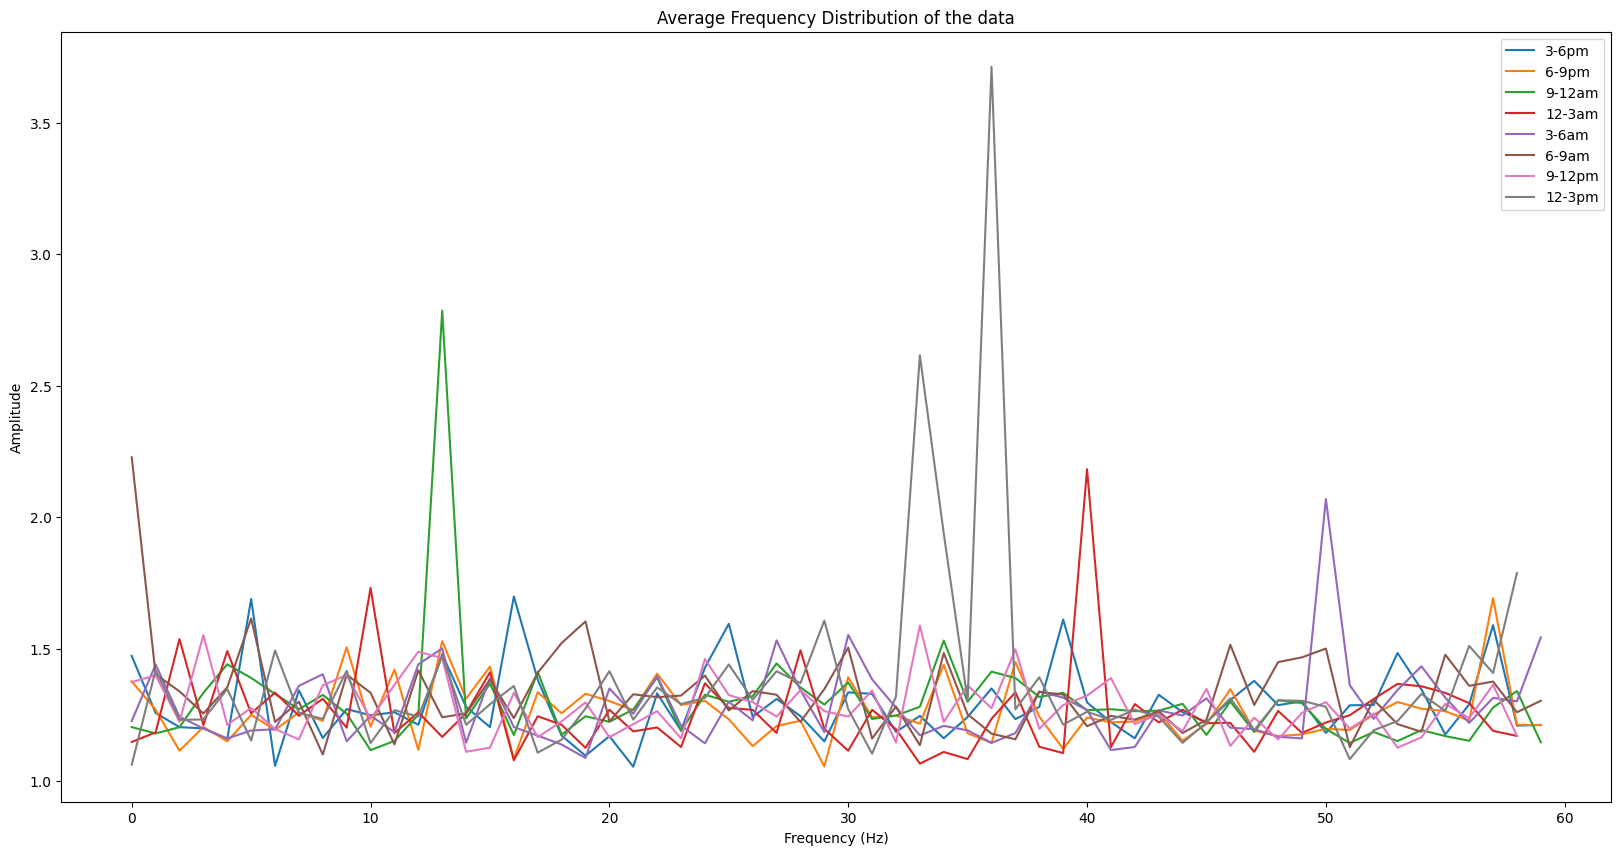

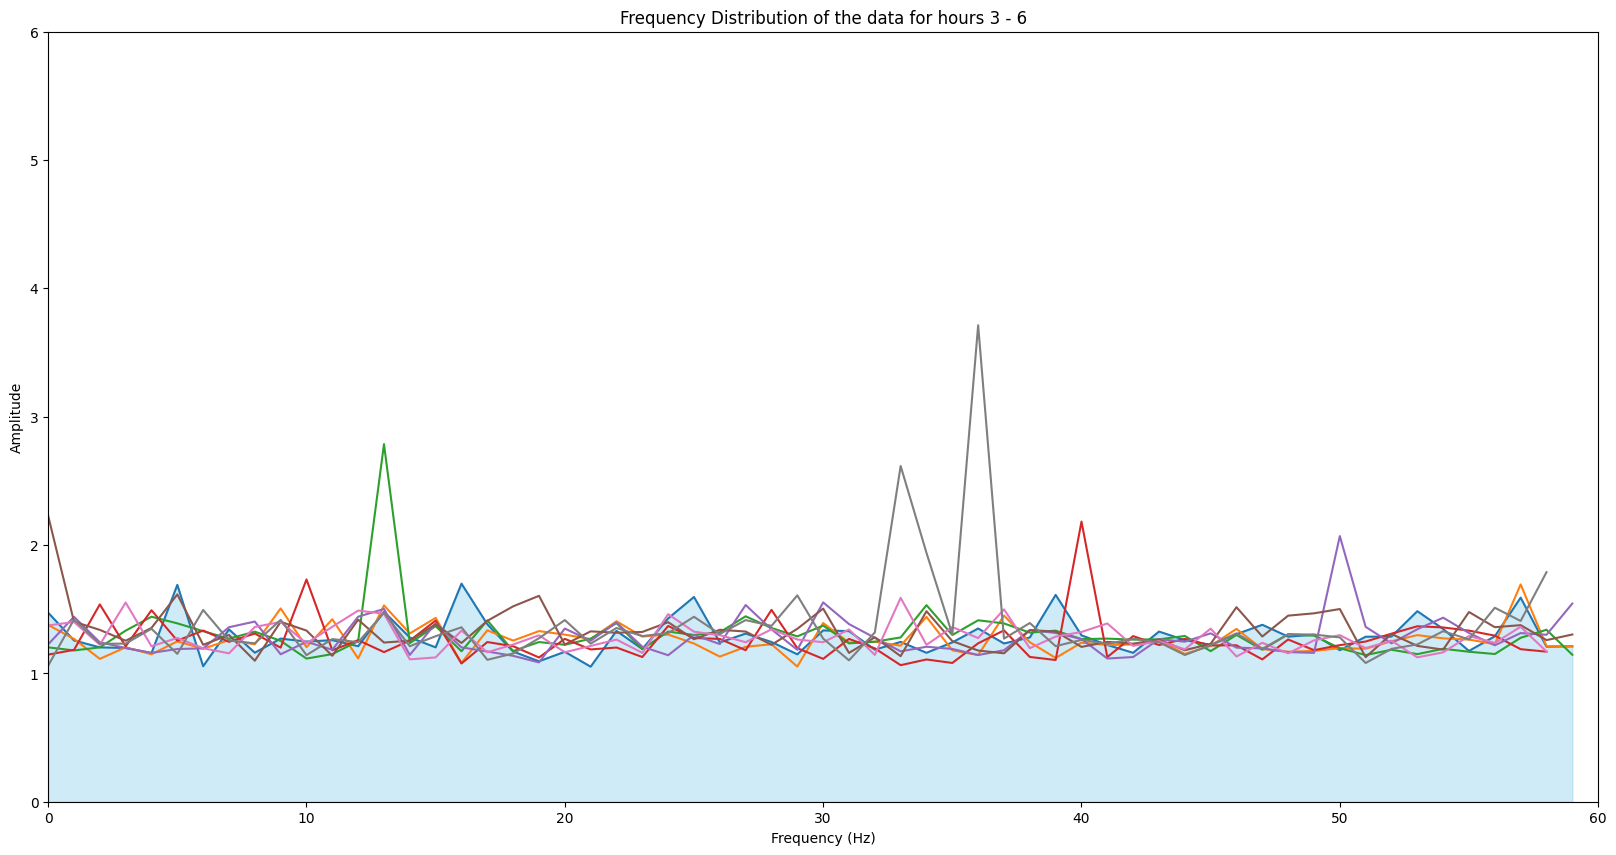

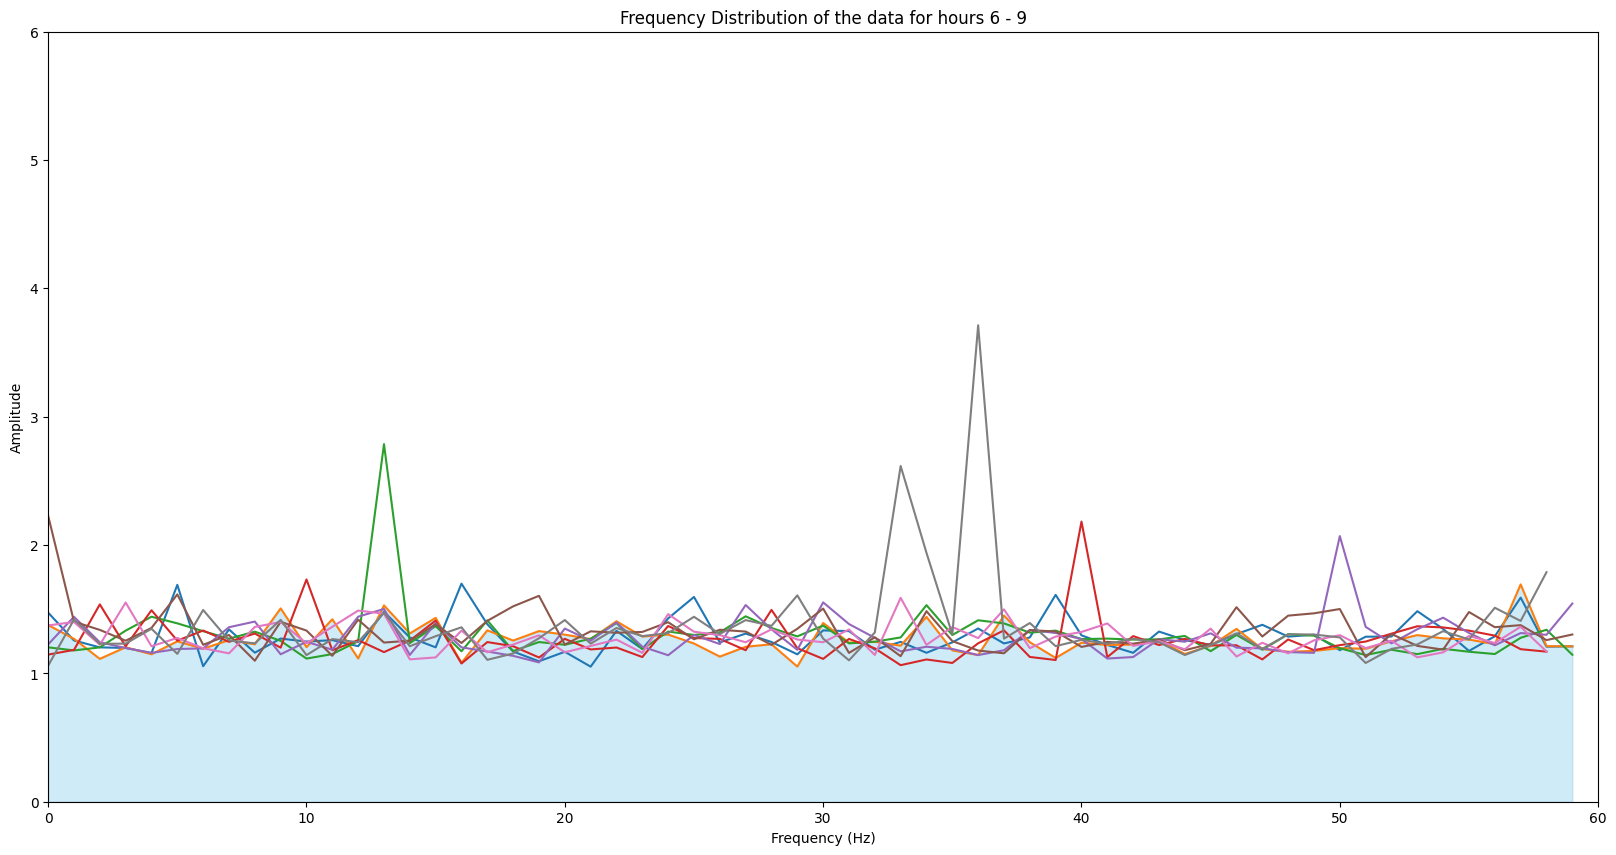

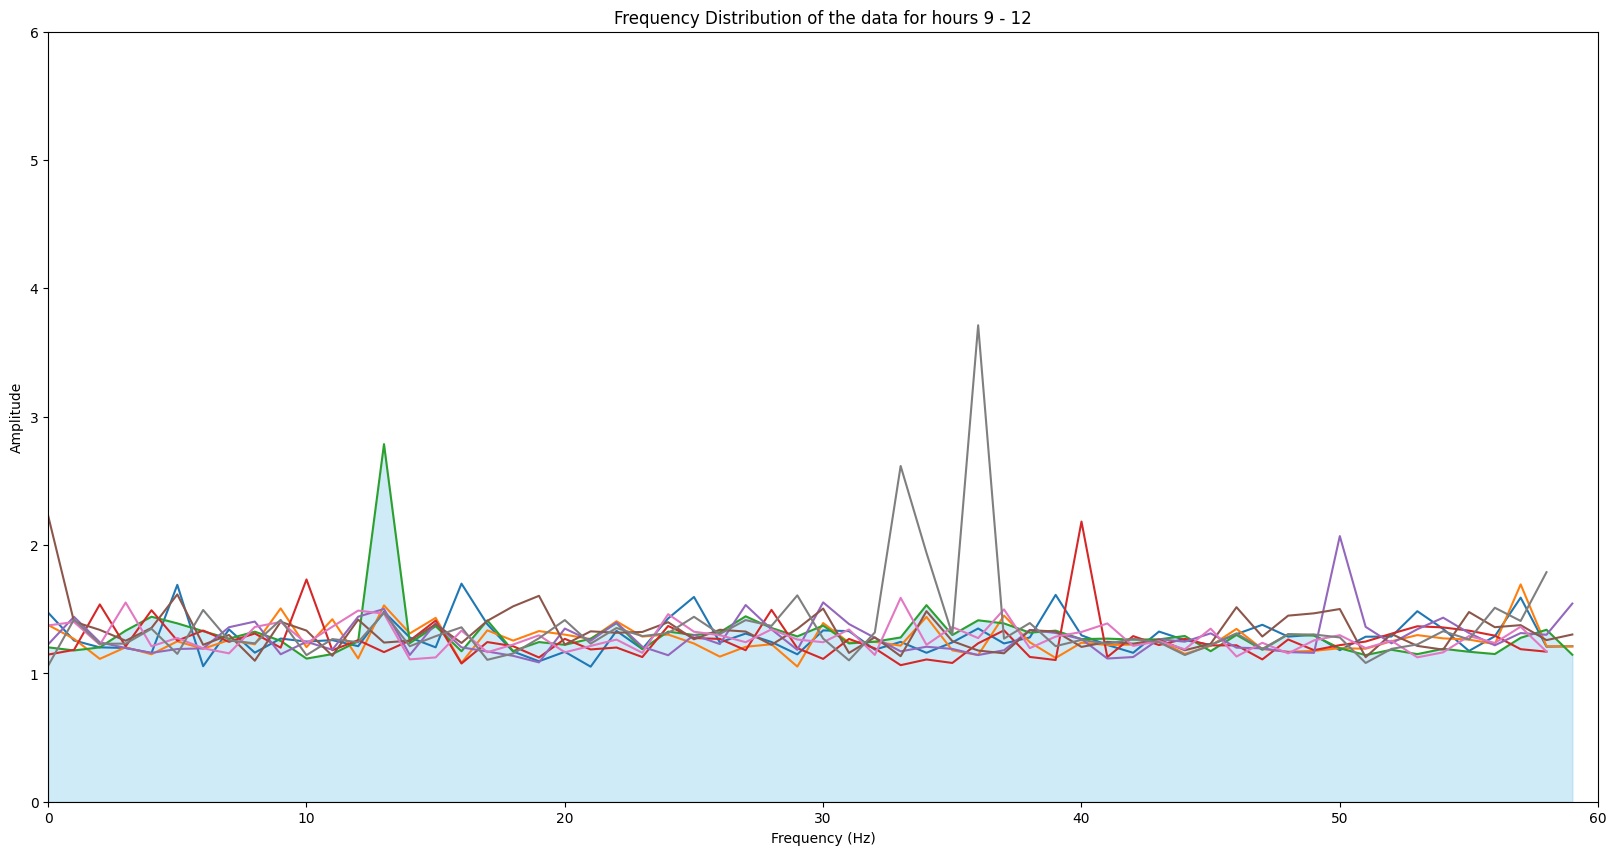

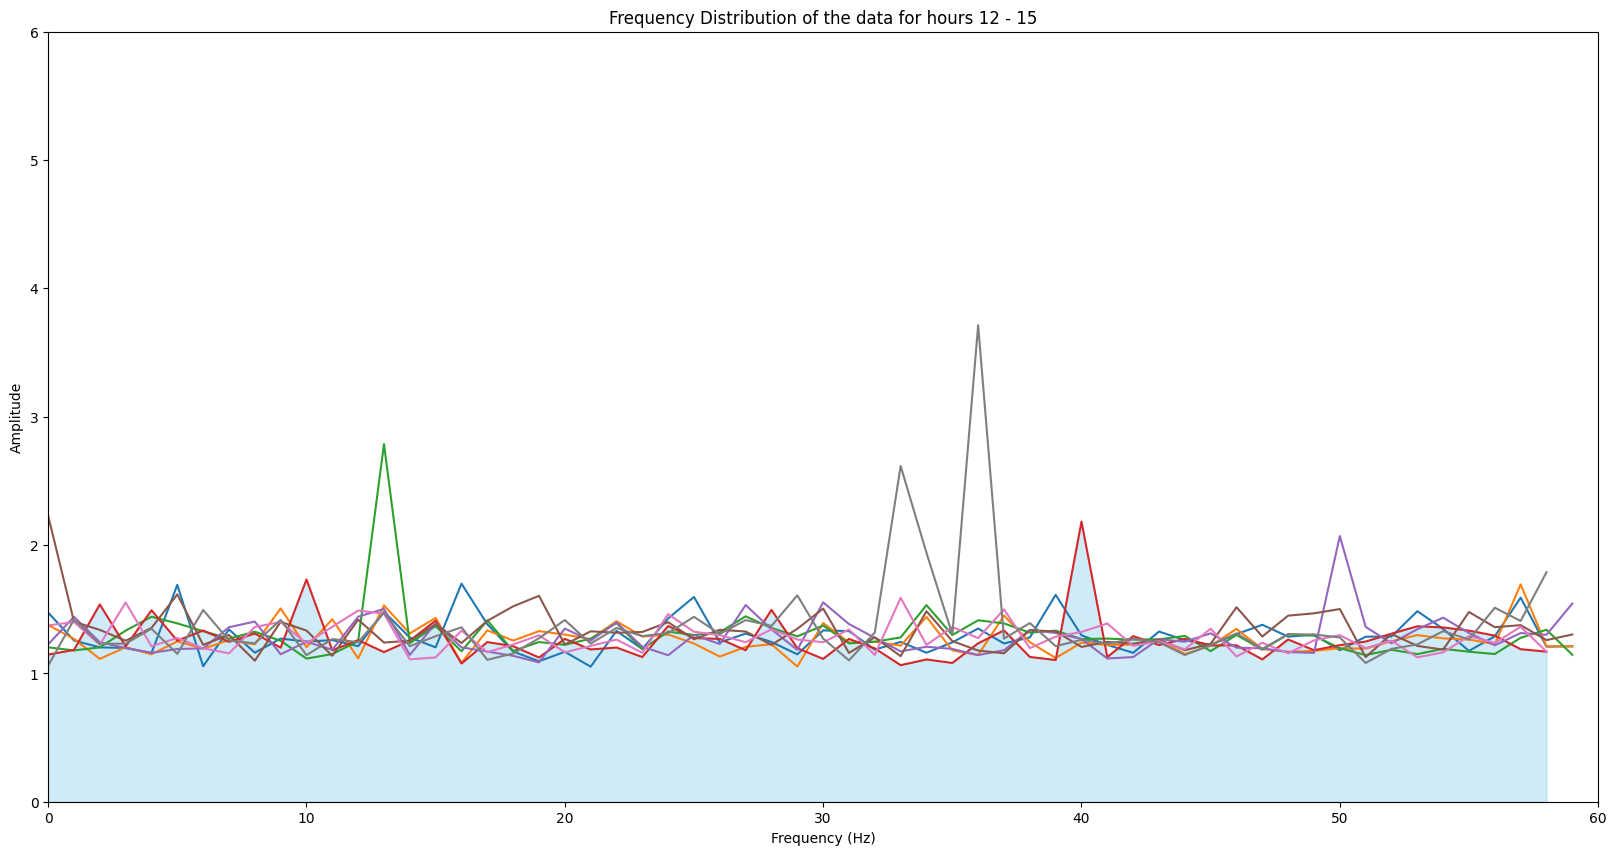

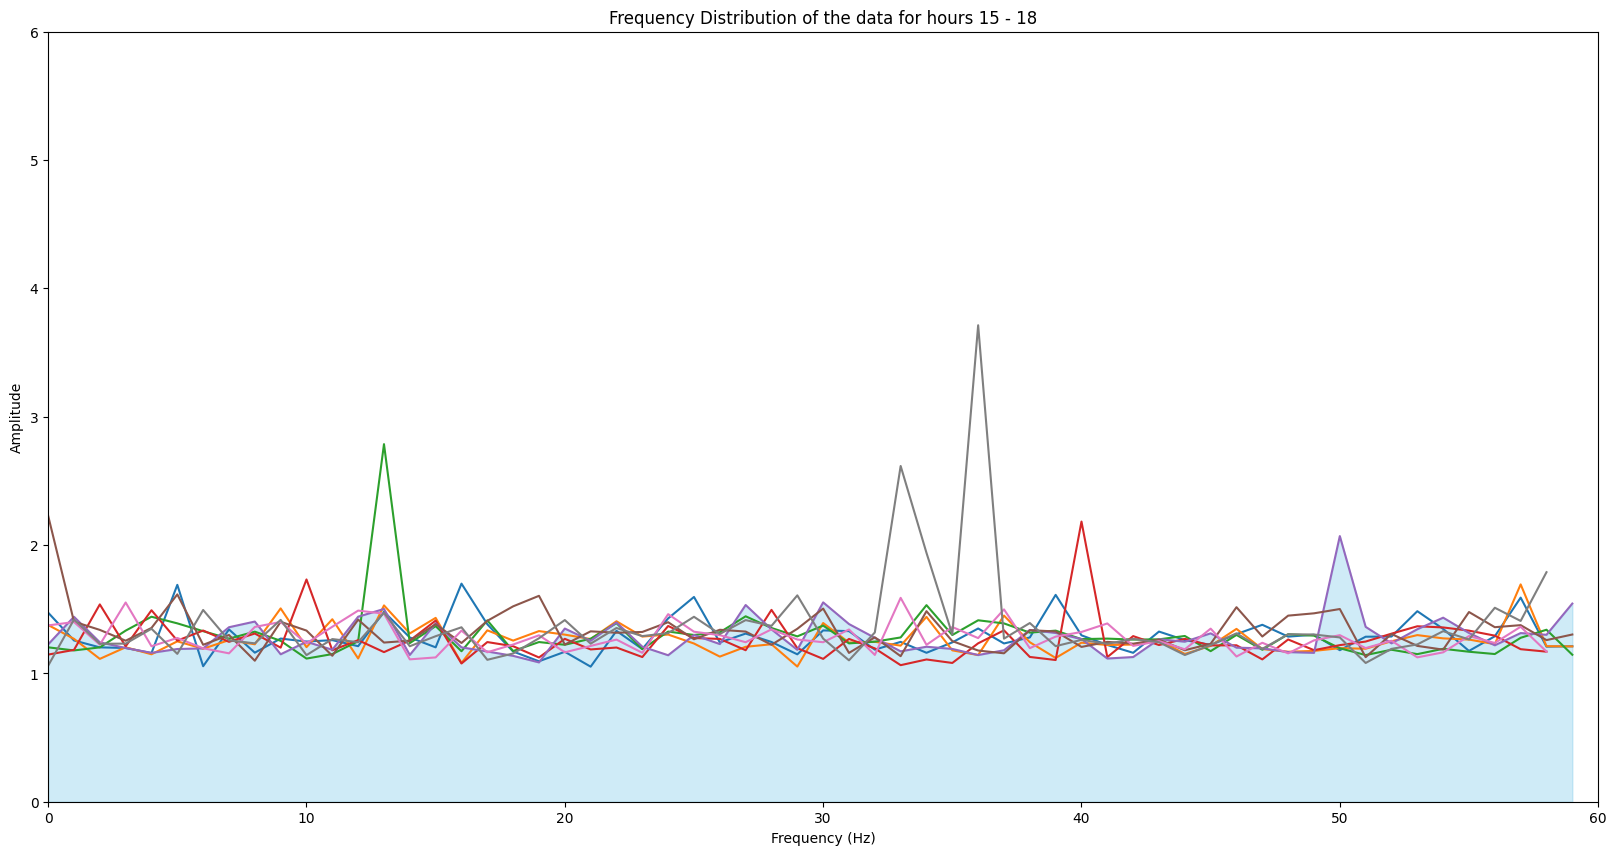

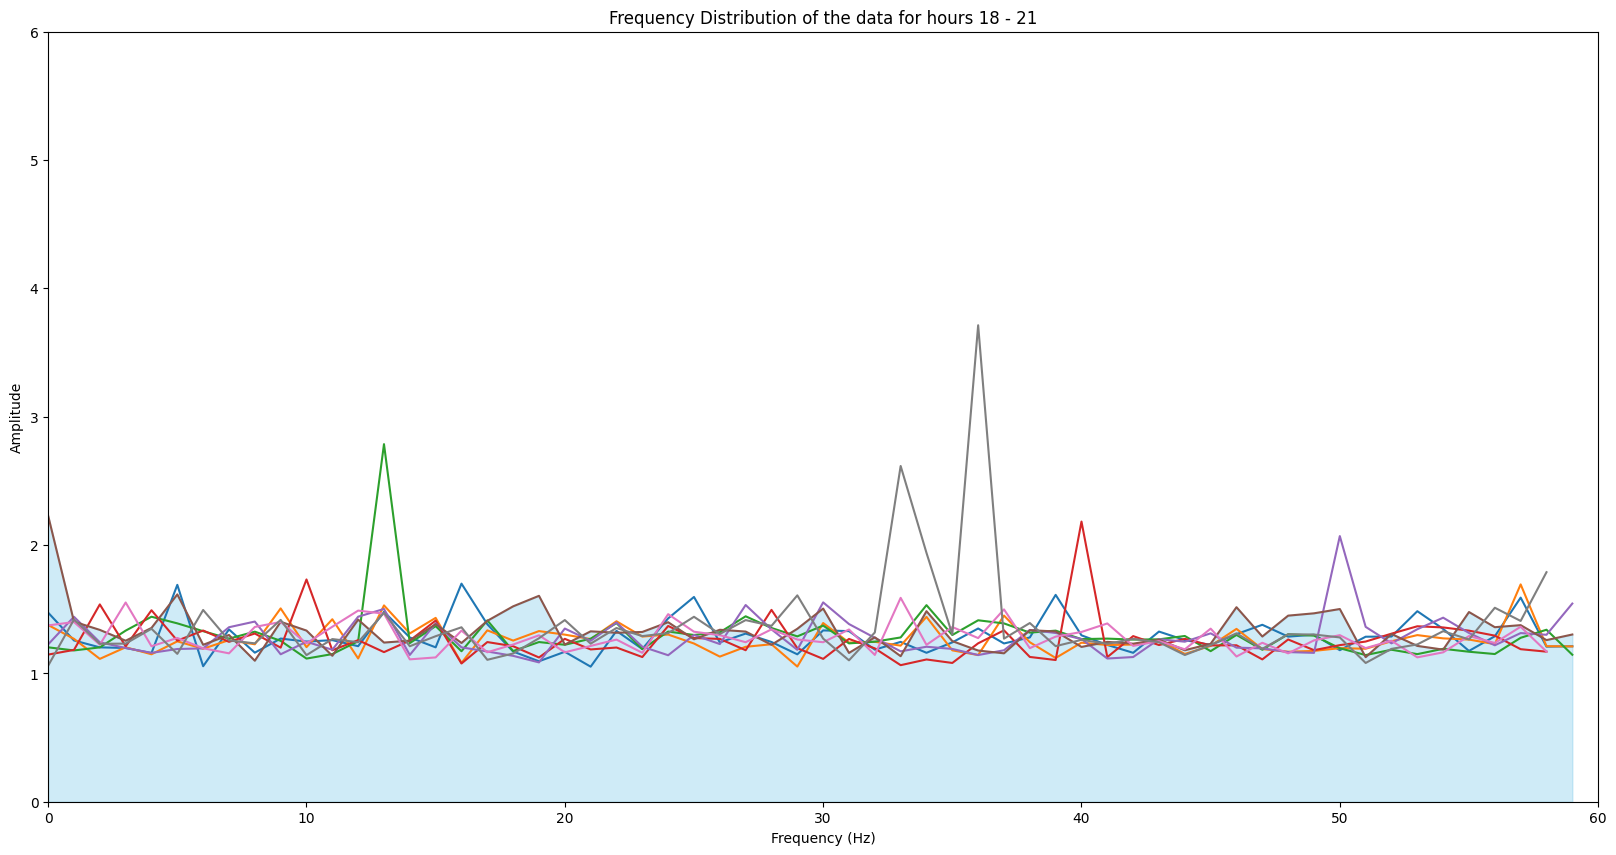

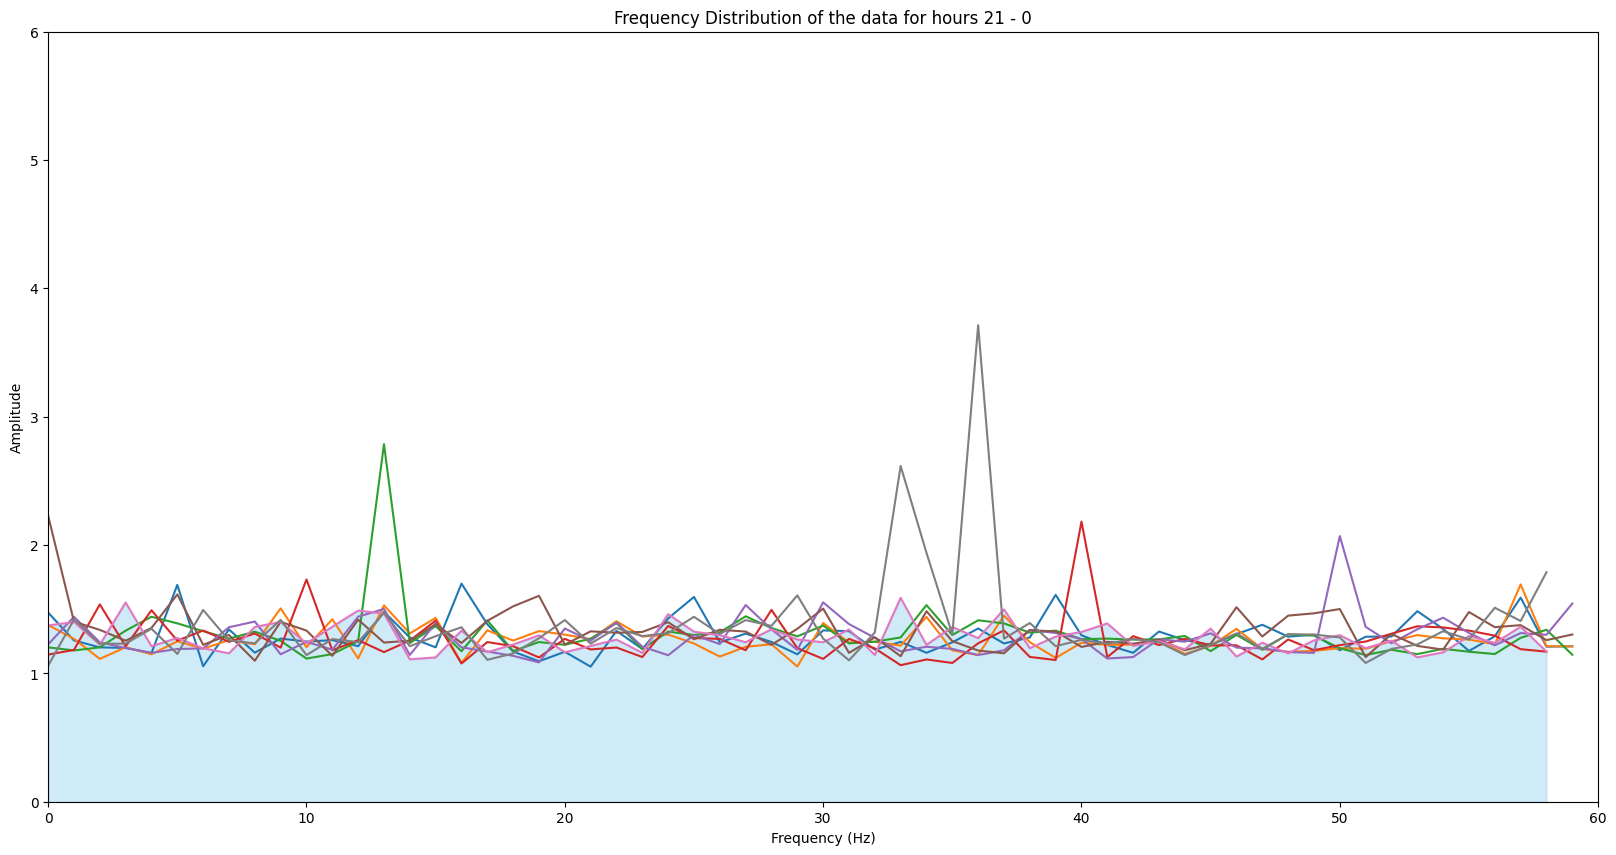

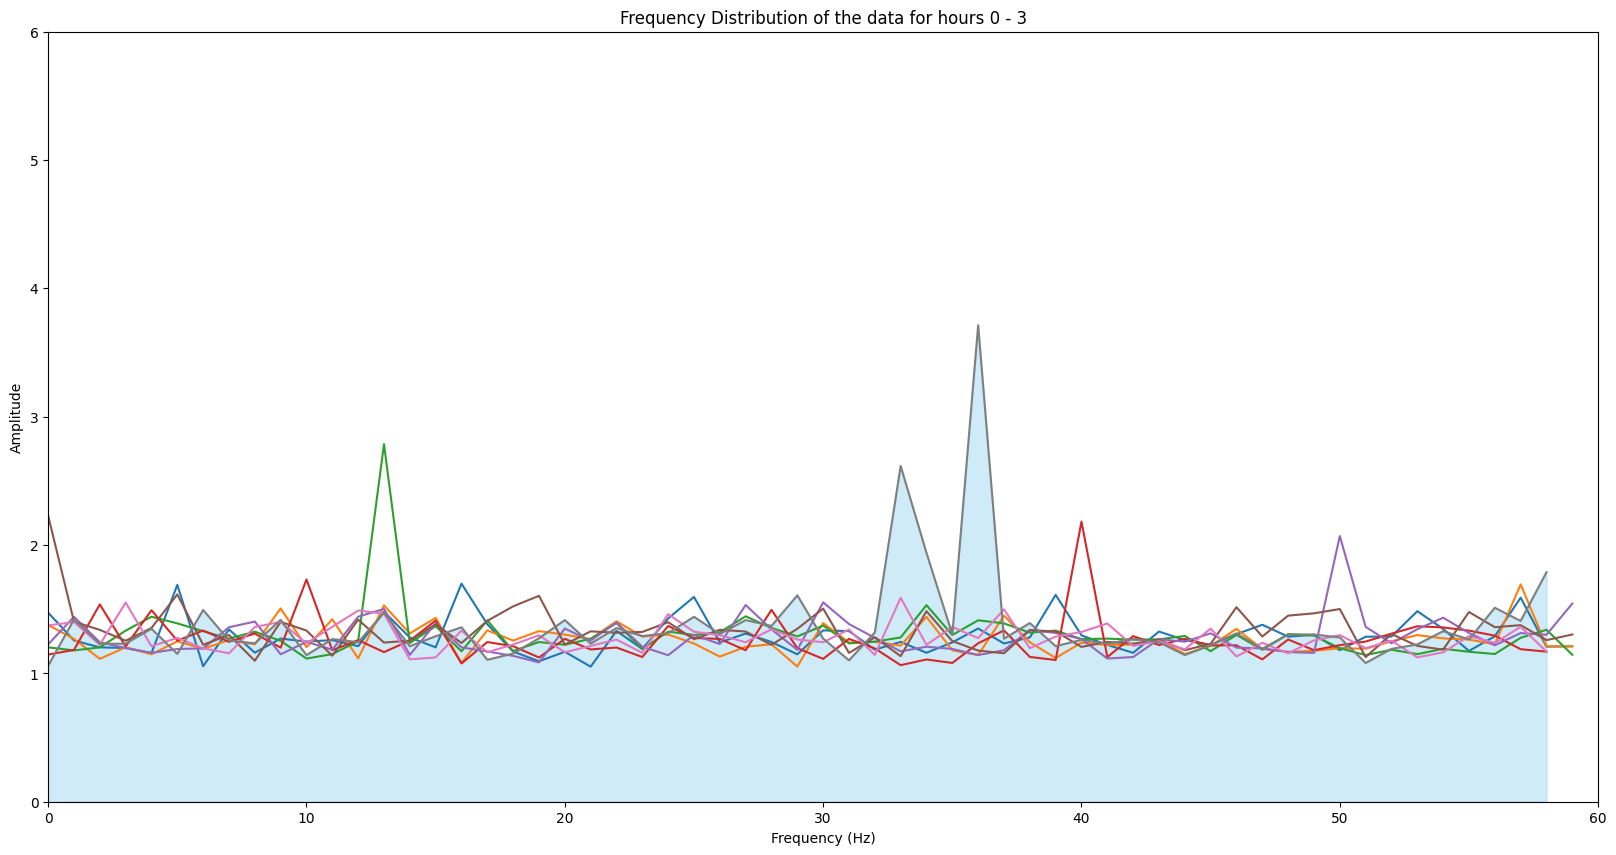

In [90]:
#Create a new dataframe average of each column for each hour
data = []
i = 3
for hour in hours:
    averages = []
    for column in hour.columns[1:]:
        averages.append(np.mean(hour[column]))
    data.append(averages)
    i += 3

#plot the average of each column for each hour
i = 3
plt.figure(figsize=(20, 10))
for hour in data:
    plt.plot(hour)

plt.legend(['3-6pm', '6-9pm', '9-12am', '12-3am', '3-6am', '6-9am', '9-12pm', '12-3pm'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Average Frequency Distribution of the data')
plt.show()

#highlight the area under the curve for each hour individually
i = 3
for hour in data:
    plt.figure(figsize=(20, 10))
    plt.xlim(0, 60)
    plt.ylim(0, 6)
    plt.fill_between(np.arange(0, len(hour)), hour, color = 'skyblue', alpha = 0.4)
    for hour in data:
        plt.plot(hour)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Frequency Distribution of the data for hours ' + str((i) % 24) + ' - ' + str((i + 3) % 24))
    plt.show()
    i += 3

    

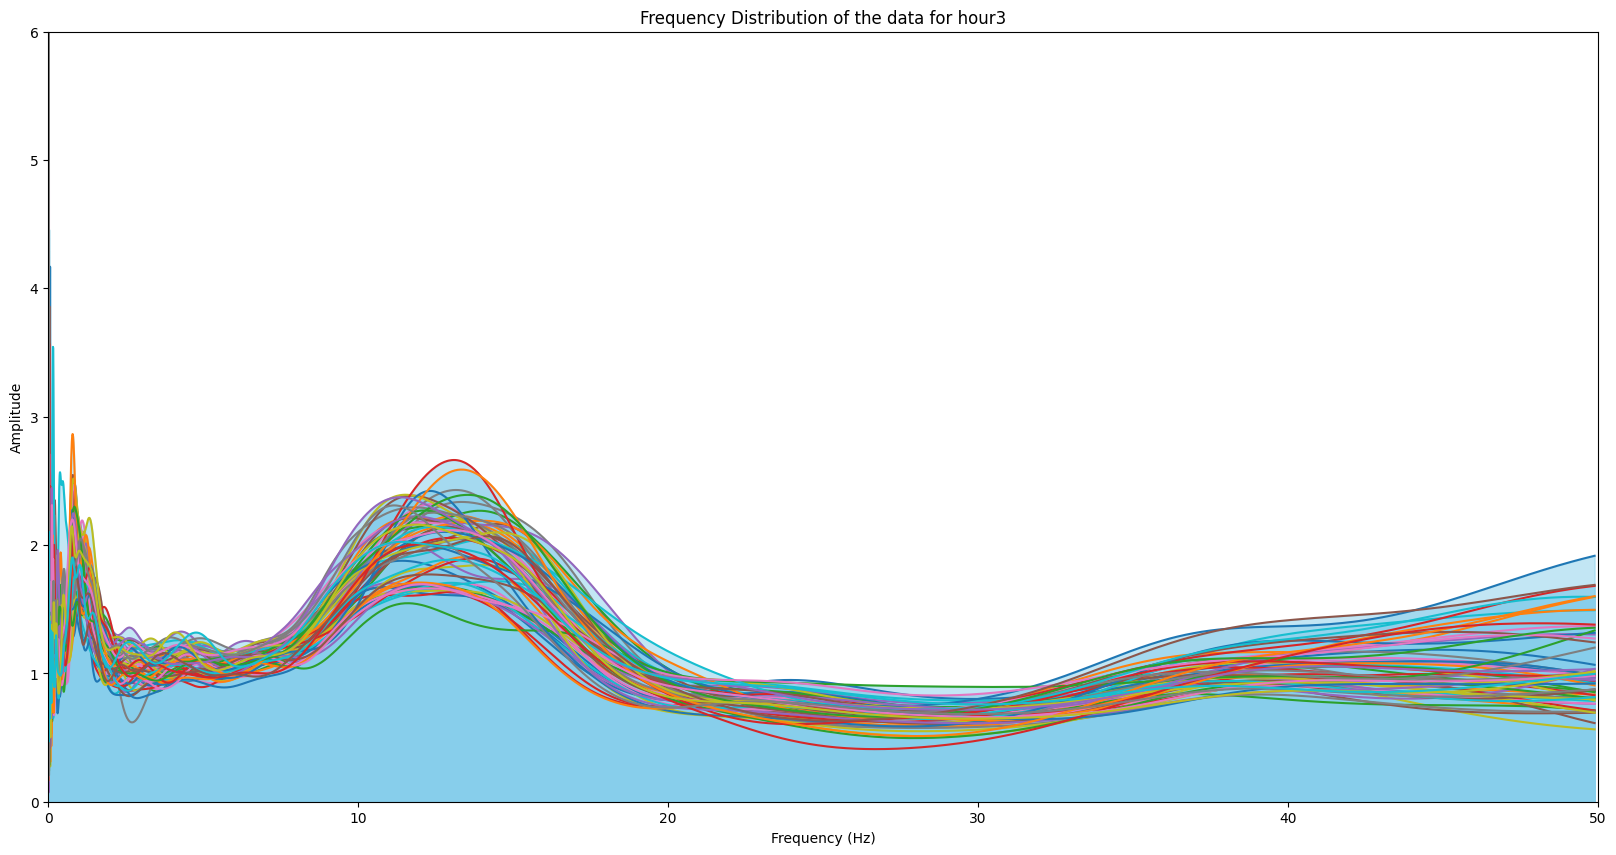

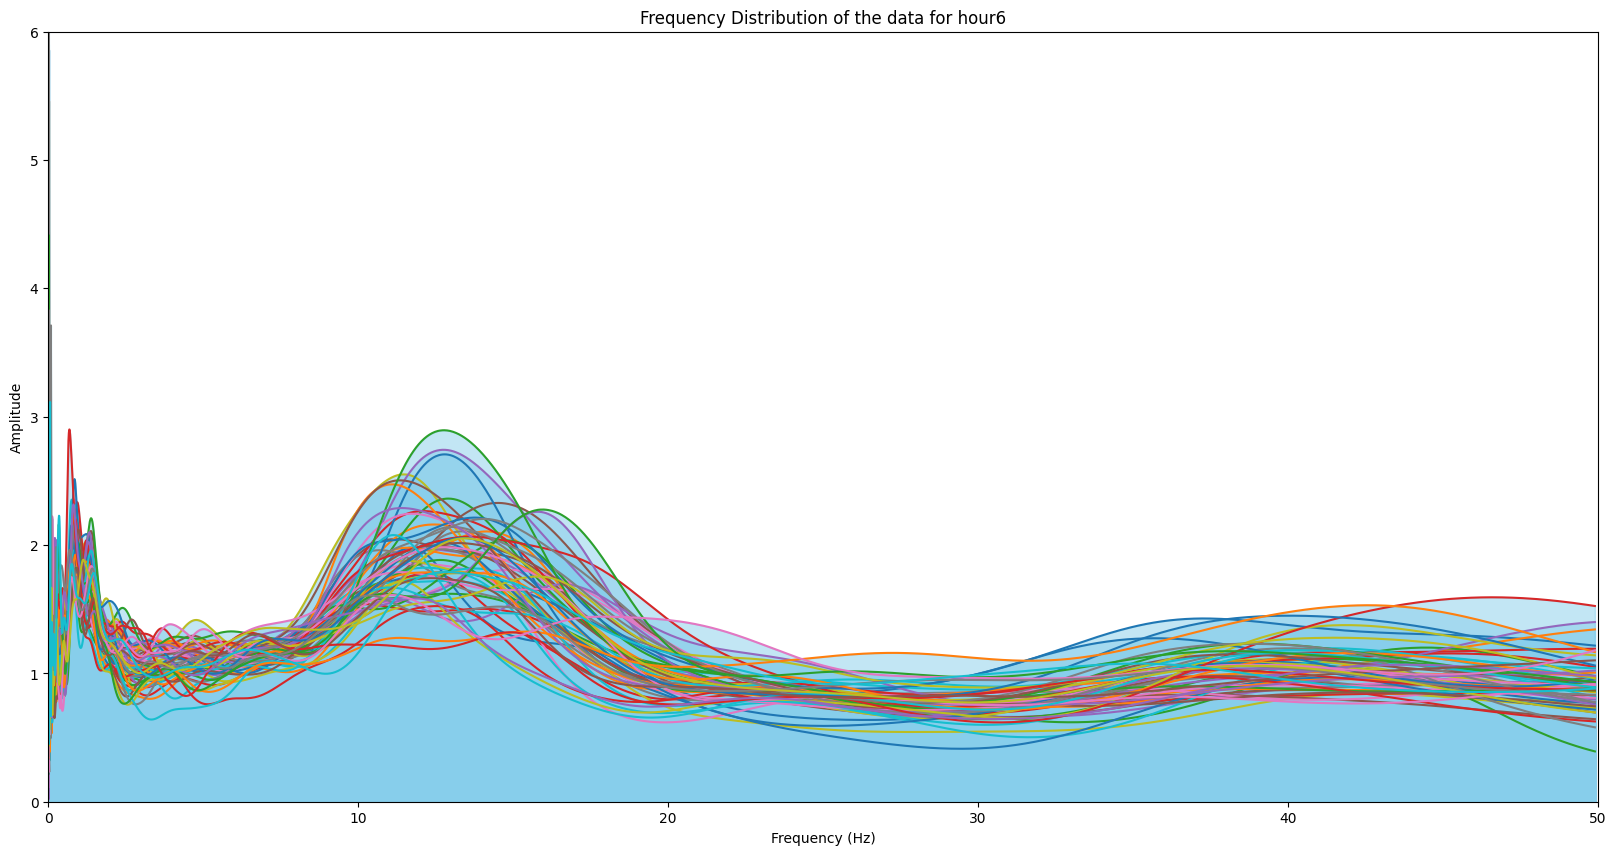

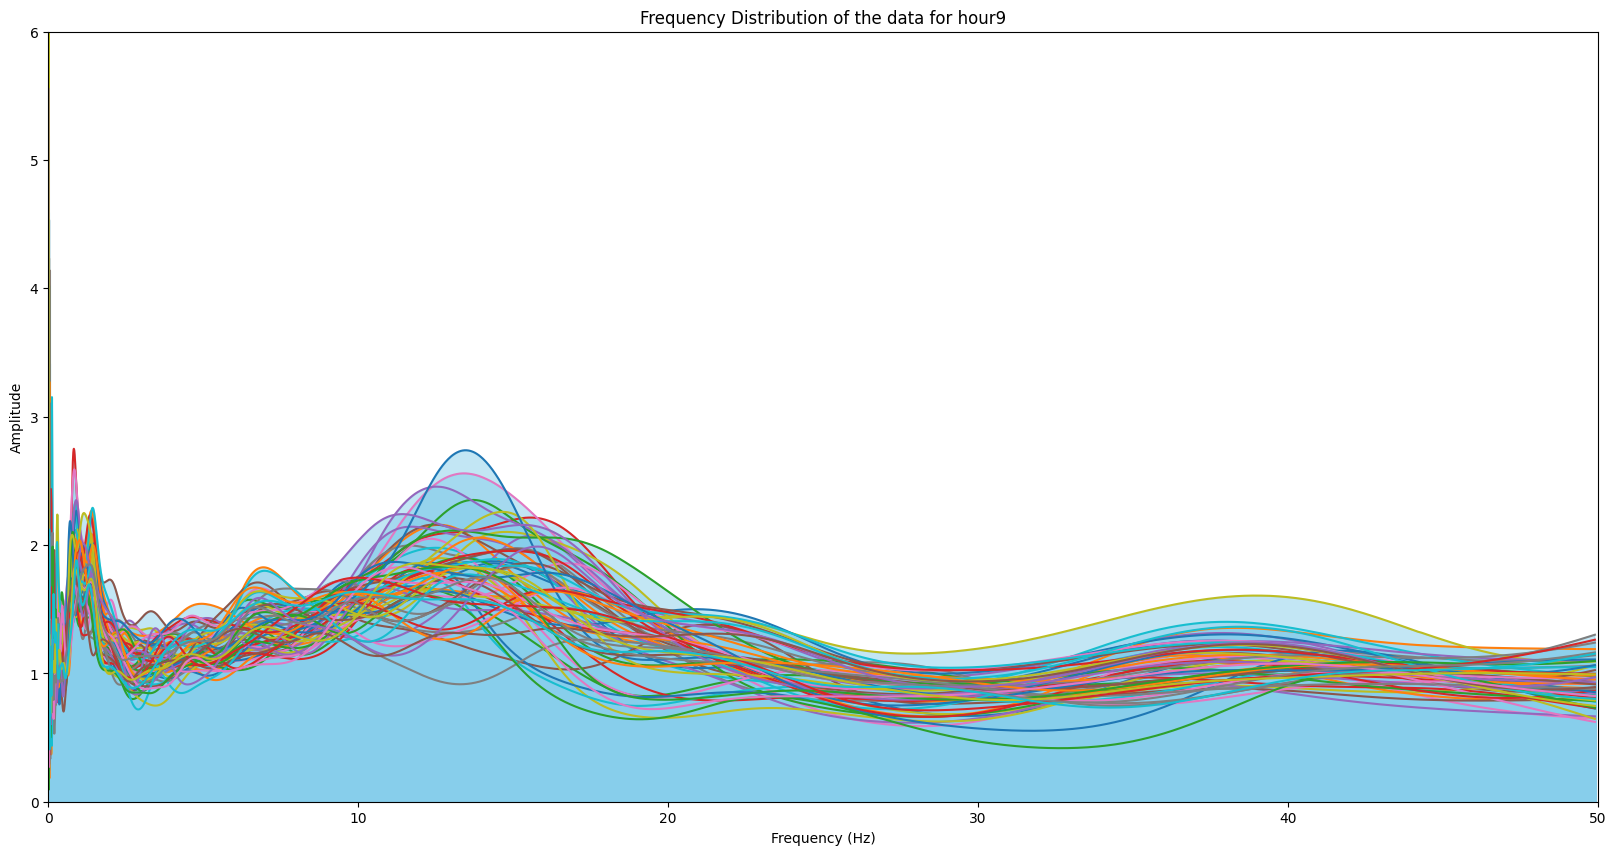

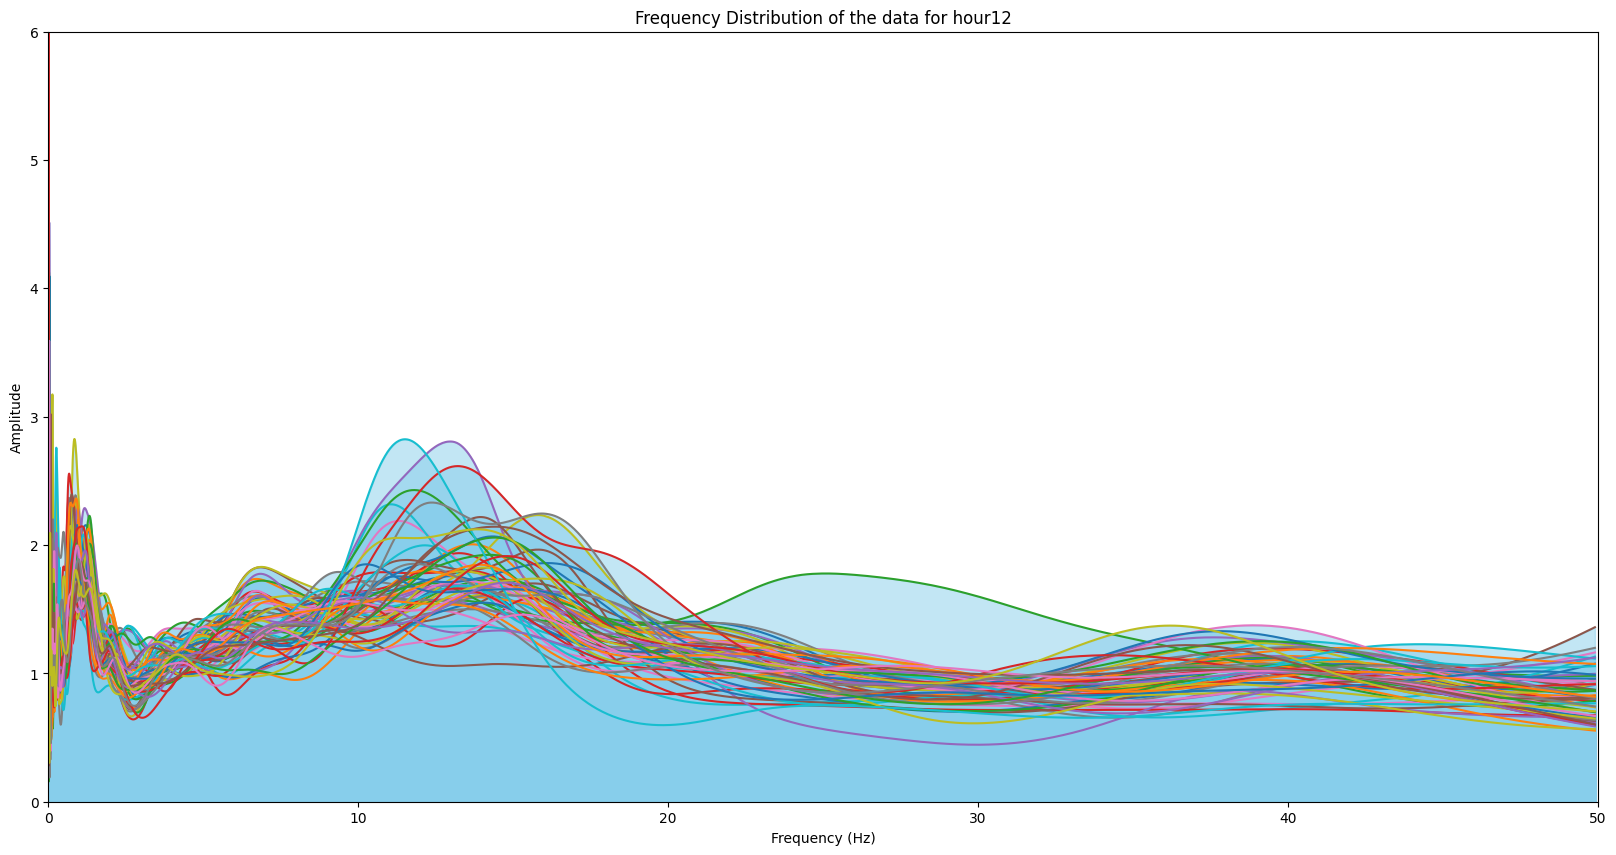

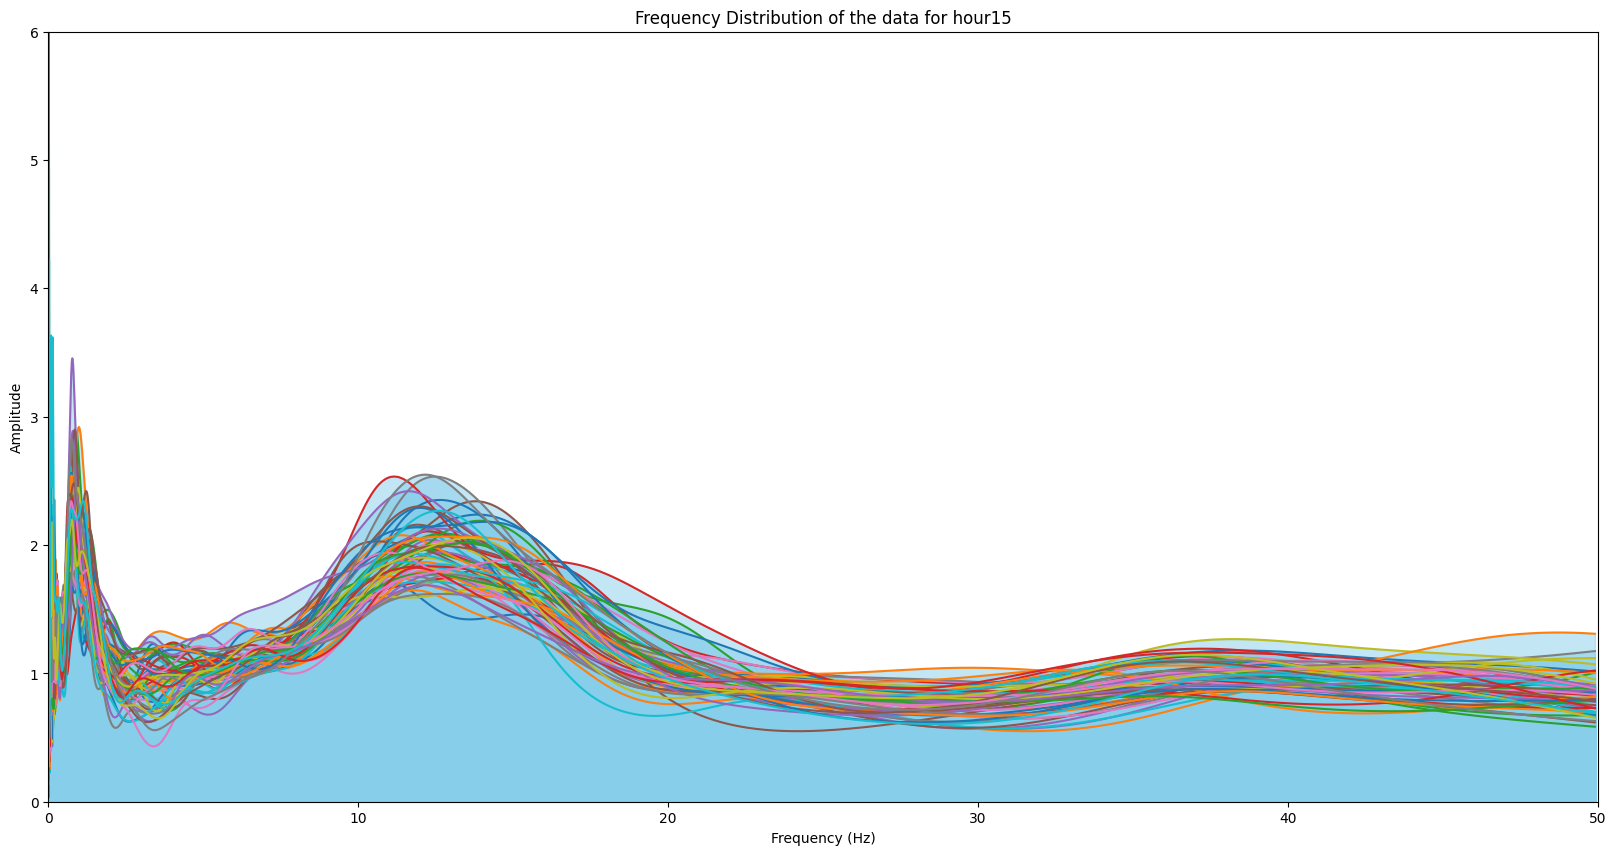

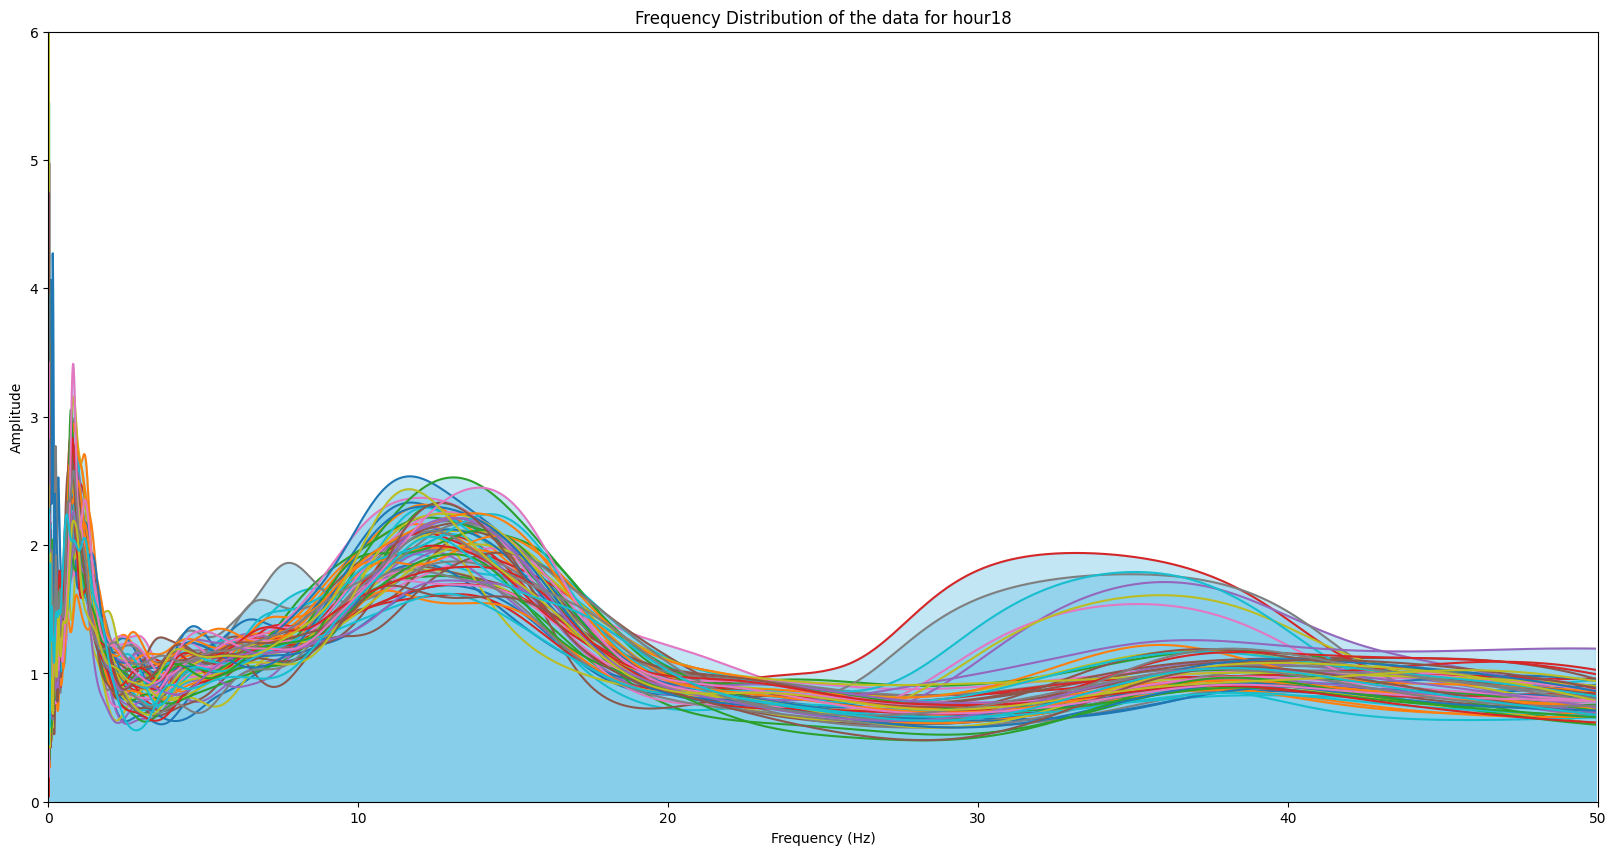

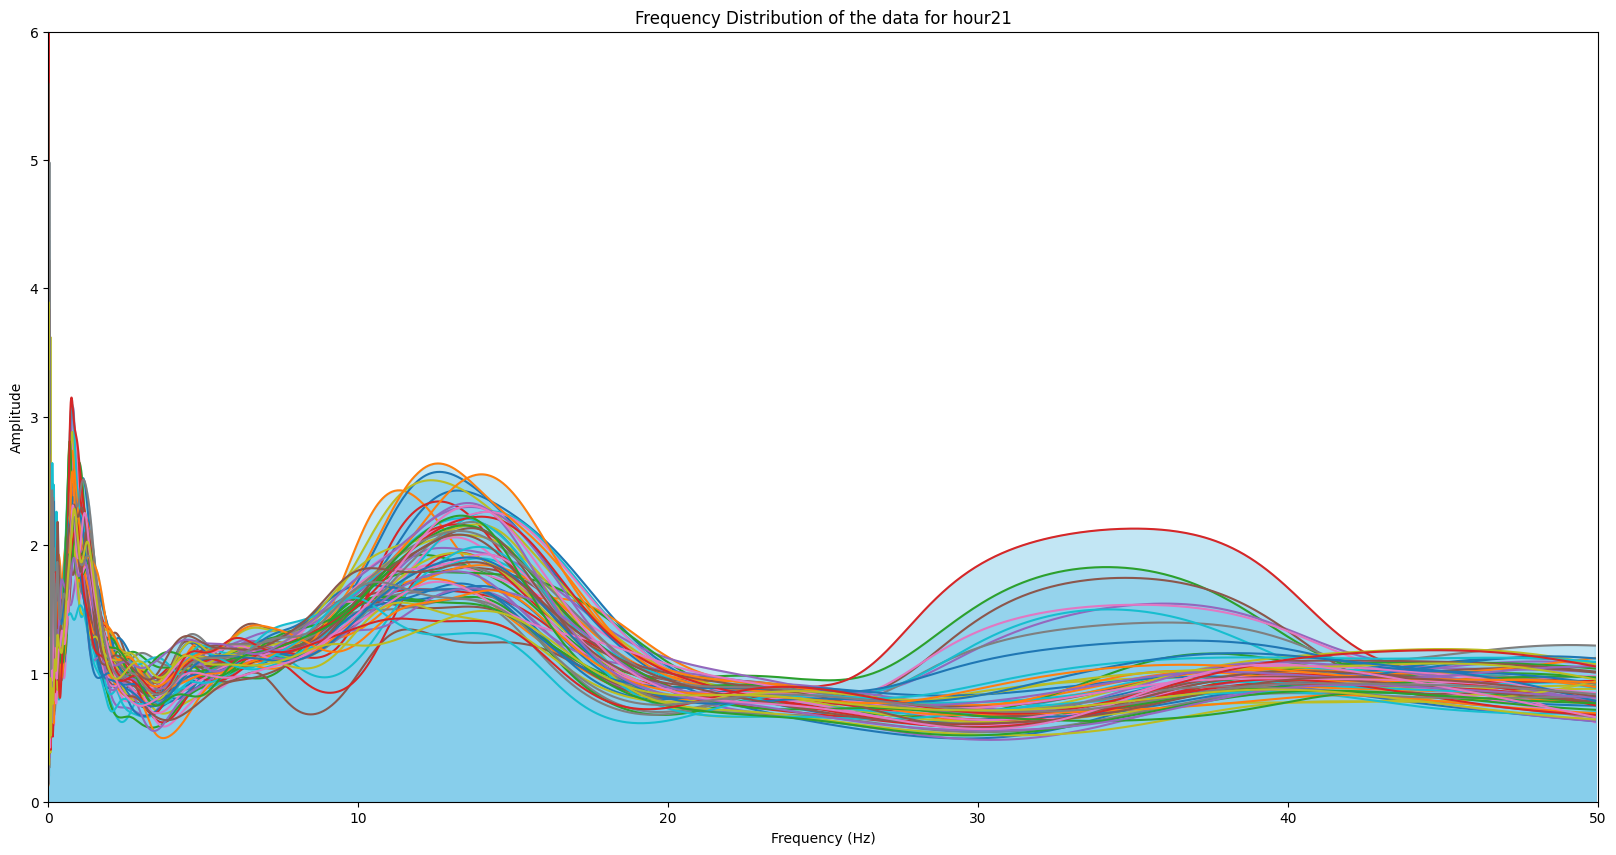

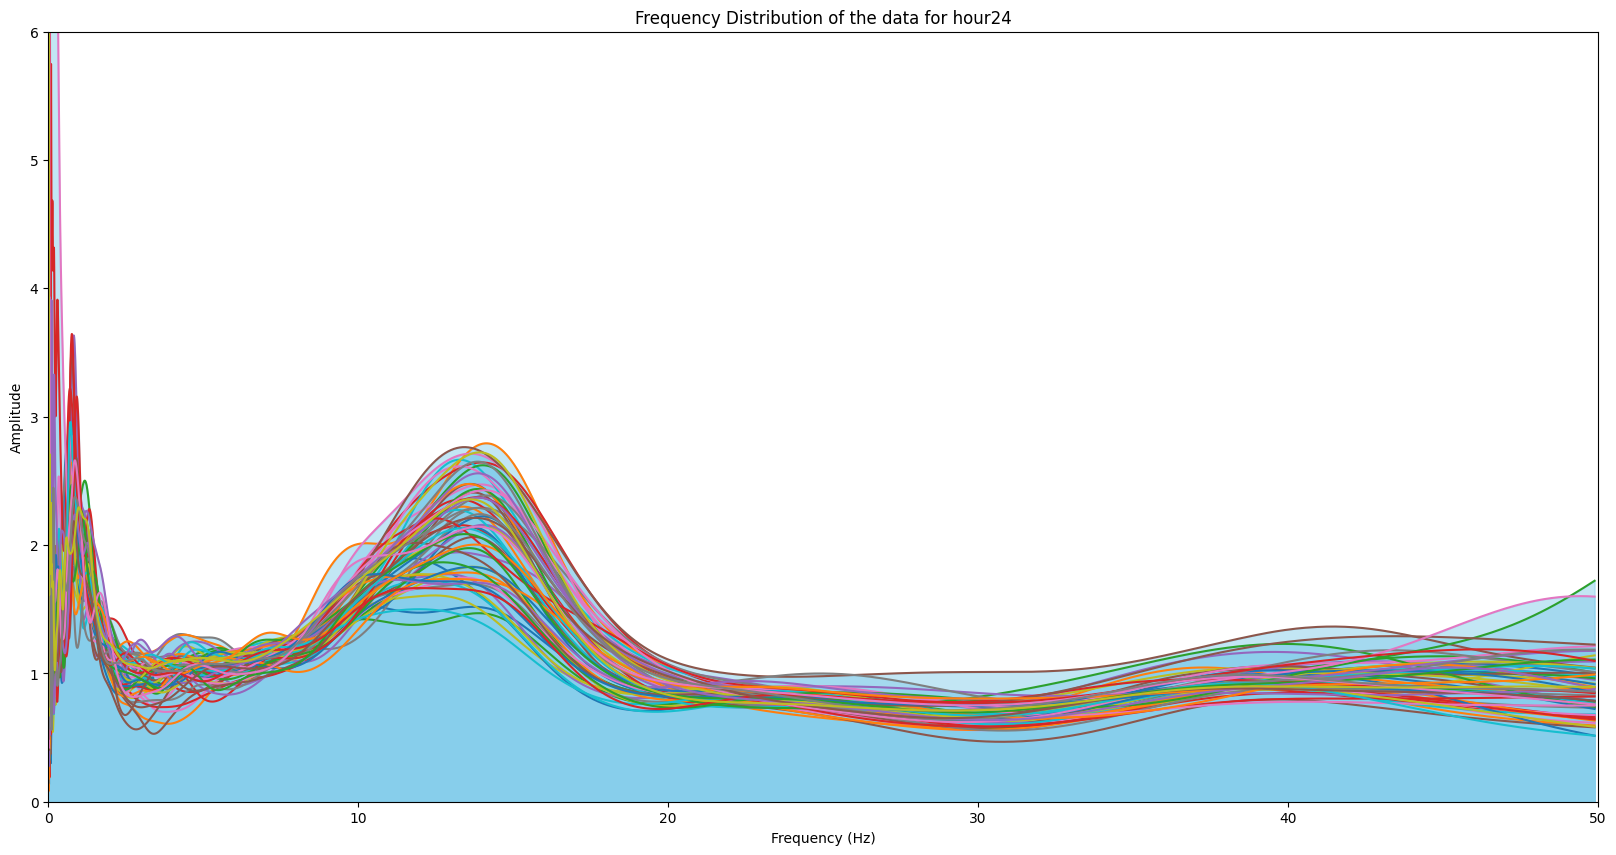

In [8]:
#Highlight the area under the curve for all the hours
i = 3
for hour in hours:
    #Size the graph
    plt.figure(figsize=(20, 10))
    #Confine the graph to specifidde limits
    plt.xlim(0, 50)
    plt.ylim(0, 6)
    #Plot the data
    for column in hour.columns[1:]:
        plt.plot(hour['Freq_Hz'], hour[column])
        plt.fill_between(hour['Freq_Hz'], hour[column], color = 'skyblue', alpha = 0.5)
    #Label the graph
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Frequency Distribution of the data for hour' + str(i))
    #Show the graph
    plt.show()
    i += 3

In [12]:
#Calculate the area under the curve for all the hours
i = 3
curve = []
for hour in hours:
    for column in hour.columns[1:]:
        curve.append([i, column, np.trapz(hour[column], hour['Freq_Hz'])])
    i += 3

print(curve)

[[3, '18:00 - 18:03', np.float64(55.58955299206366)], [3, '18:03 - 18:06', np.float64(54.94072761664633)], [3, '18:06 - 18:09', np.float64(53.96495311336266)], [3, '18:09 - 18:12', np.float64(49.430318964460334)], [3, '18:12 - 18:15', np.float64(52.16908889500636)], [3, '18:15 - 18:18', np.float64(53.70116220996986)], [3, '18:18 - 18:21', np.float64(51.160034008214424)], [3, '18:21 - 18:24', np.float64(56.74146679339347)], [3, '18:24 - 18:27', np.float64(50.631660940615)], [3, '18:27 - 18:30', np.float64(54.73191097920769)], [3, '18:30 - 18:33', np.float64(51.704533928387534)], [3, '18:33 - 18:36', np.float64(54.19311637645952)], [3, '18:36 - 18:39', np.float64(53.86258133965559)], [3, '18:39 - 18:42', np.float64(49.187397203626176)], [3, '18:42 - 18:45', np.float64(55.98973072506318)], [3, '18:45- 18:48', np.float64(53.95579121047434)], [3, '18:48 - 18:51', np.float64(56.67273325716381)], [3, '18:51 - 18:54', np.float64(57.36919376894969)], [3, '18:54 - 18:57', np.float64(51.532084778

/var/folders/s8/m1w071013fn7qn7355kdj9n80000gn/T/ipykernel_54901/4031988905.py:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  curve.append([i, column, np.trapz(hour[column], hour['Freq_Hz'])])


[[ 1.58861391 -2.18696971  0.564089   ... -1.29881001  2.25556773
  -0.9047383 ]
 [ 1.60210051 -2.18816379  0.56519323 ... -1.30036683  2.27869359
  -0.90581444]
 [ 1.61561927 -2.18936072  0.56630009 ... -1.30192737  2.30187458
  -0.90689314]
 ...
 [-0.42900411 -0.85887664 -0.83904904 ... -0.93590859 -0.97859482
  -0.76017719]
 [-0.43412063 -0.86034358 -0.84505362 ... -0.9390268  -0.98075297
  -0.76050359]
 [-0.43932137 -0.86171975 -0.85105757 ... -0.94211653 -0.98300194
  -0.76083726]]


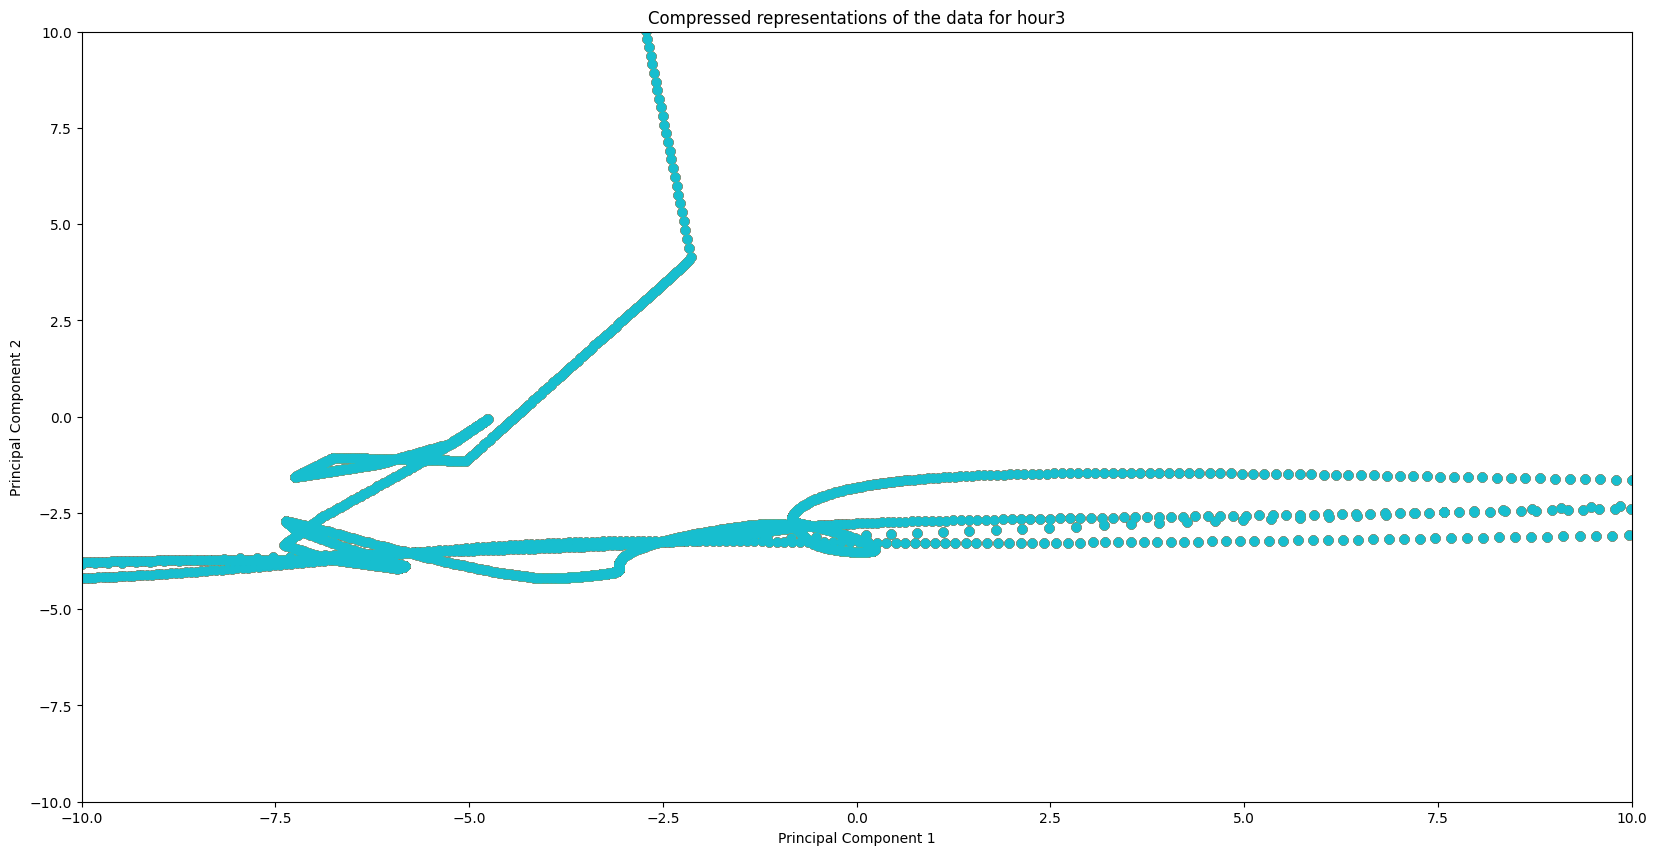

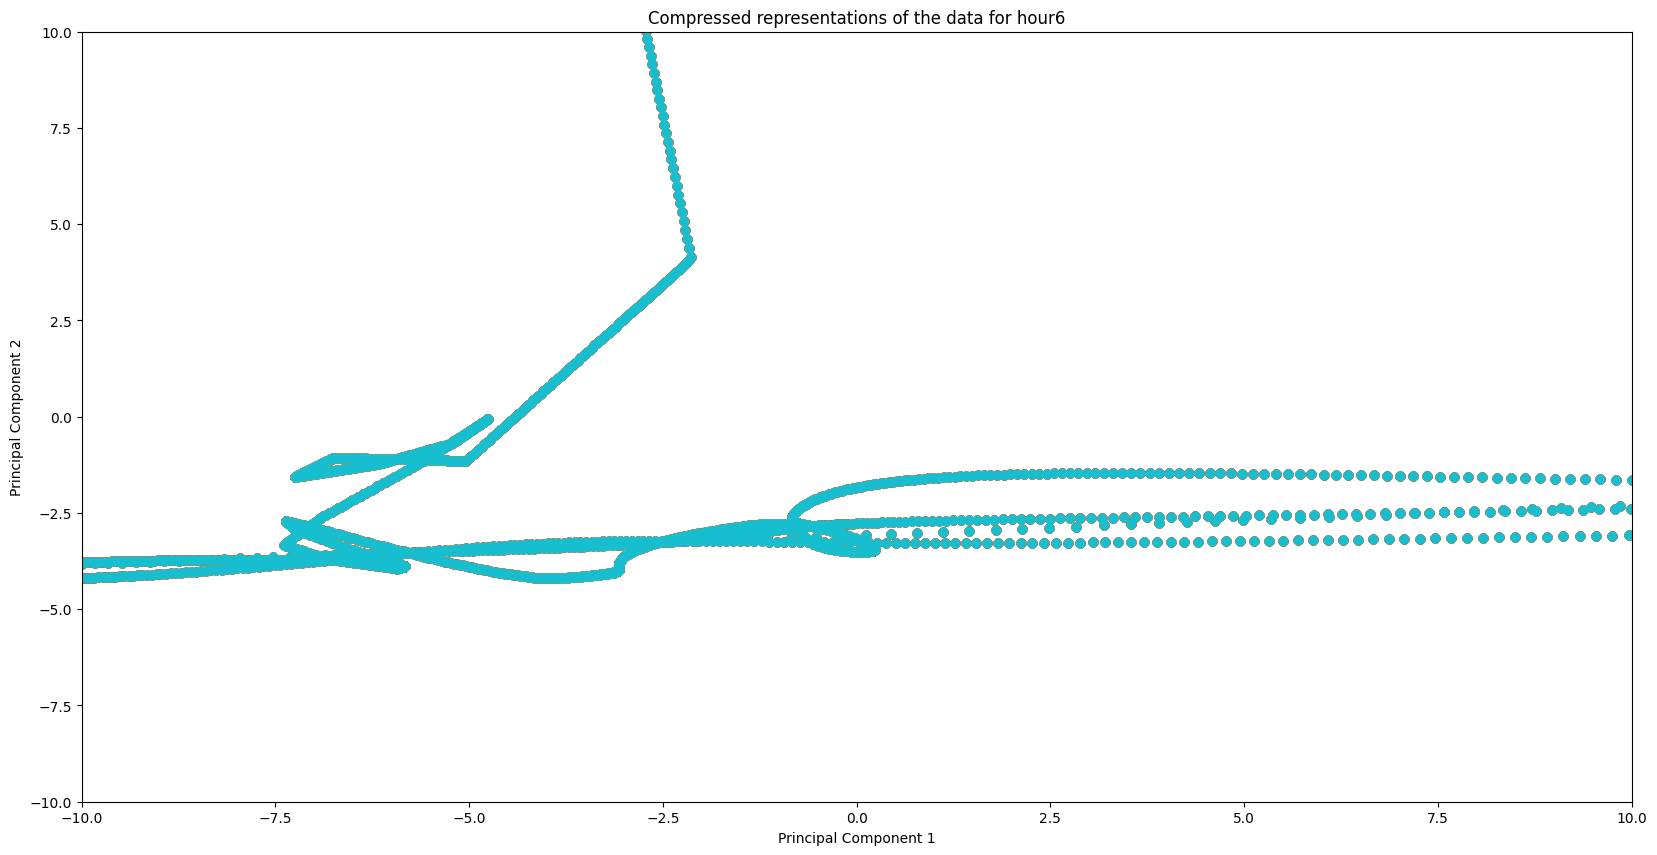

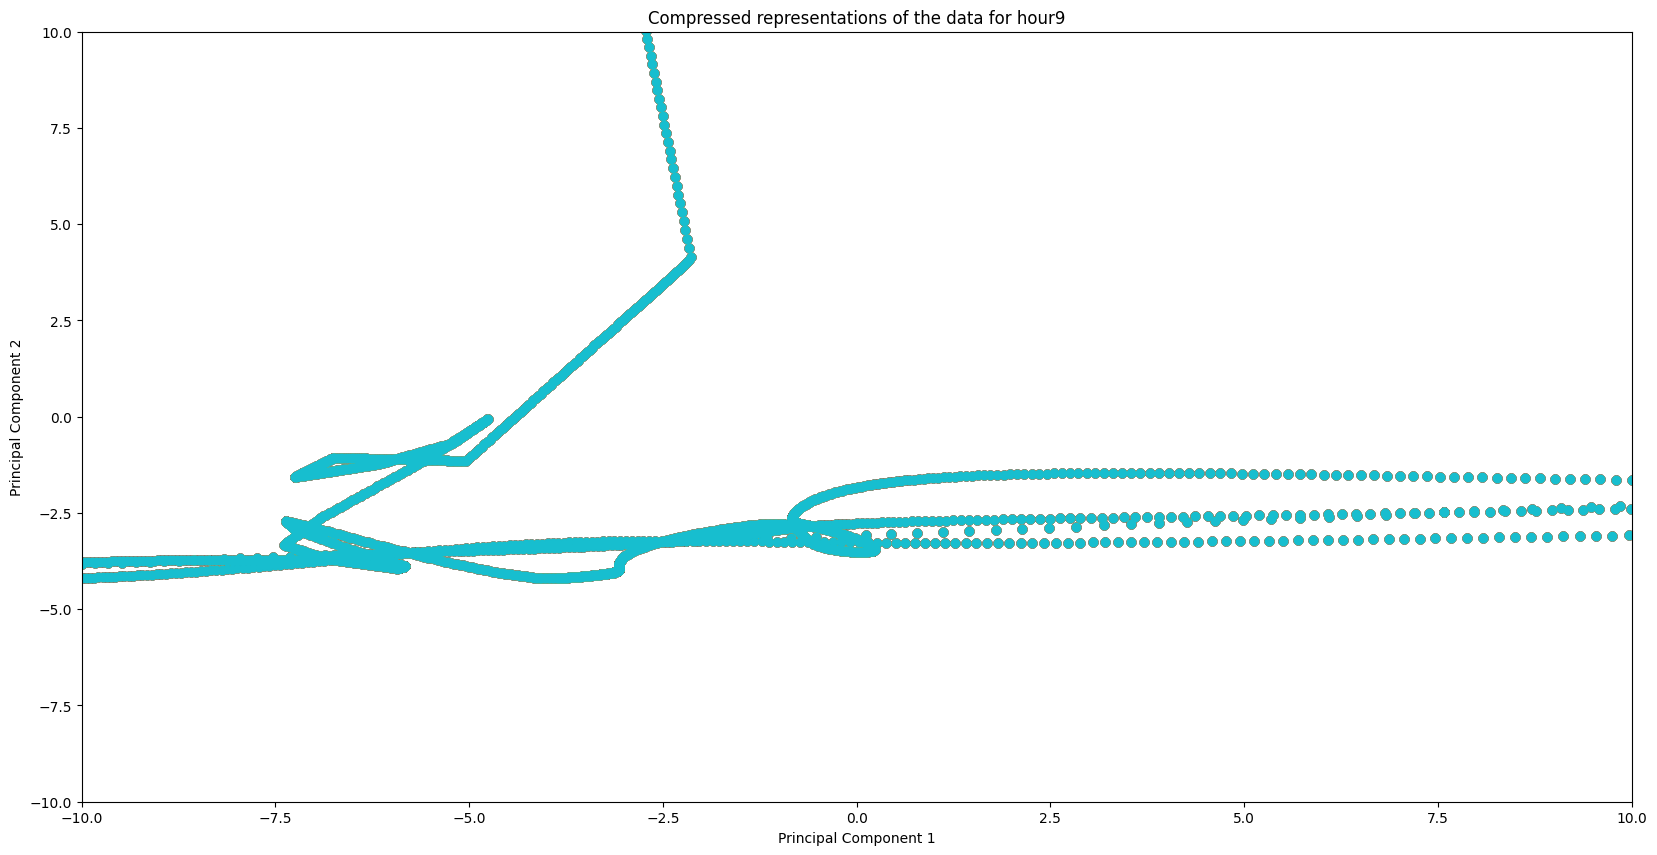

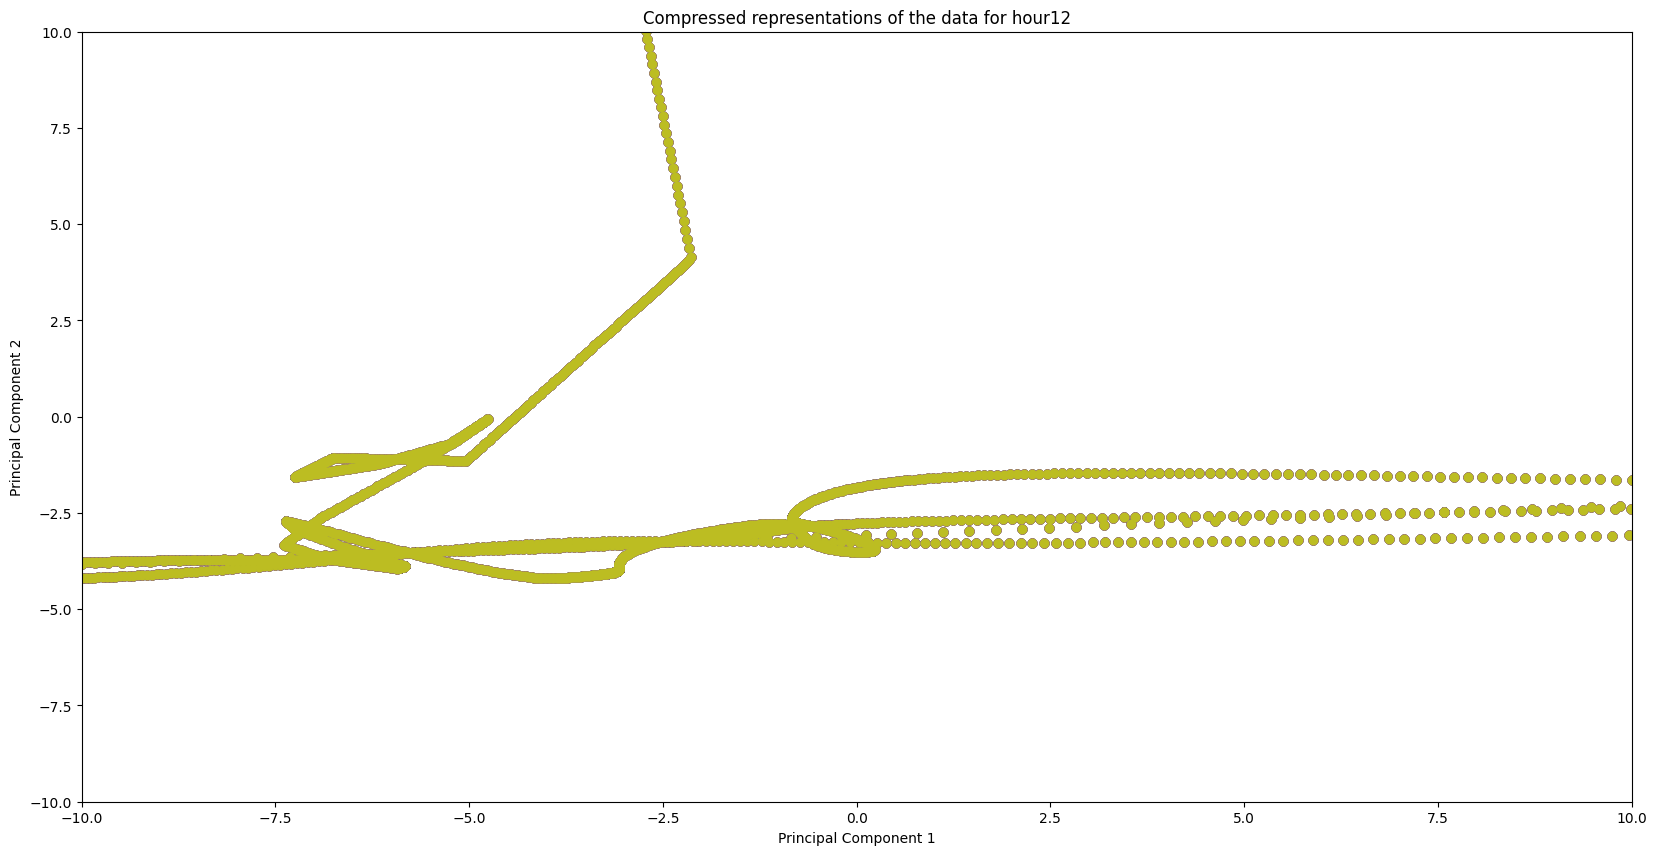

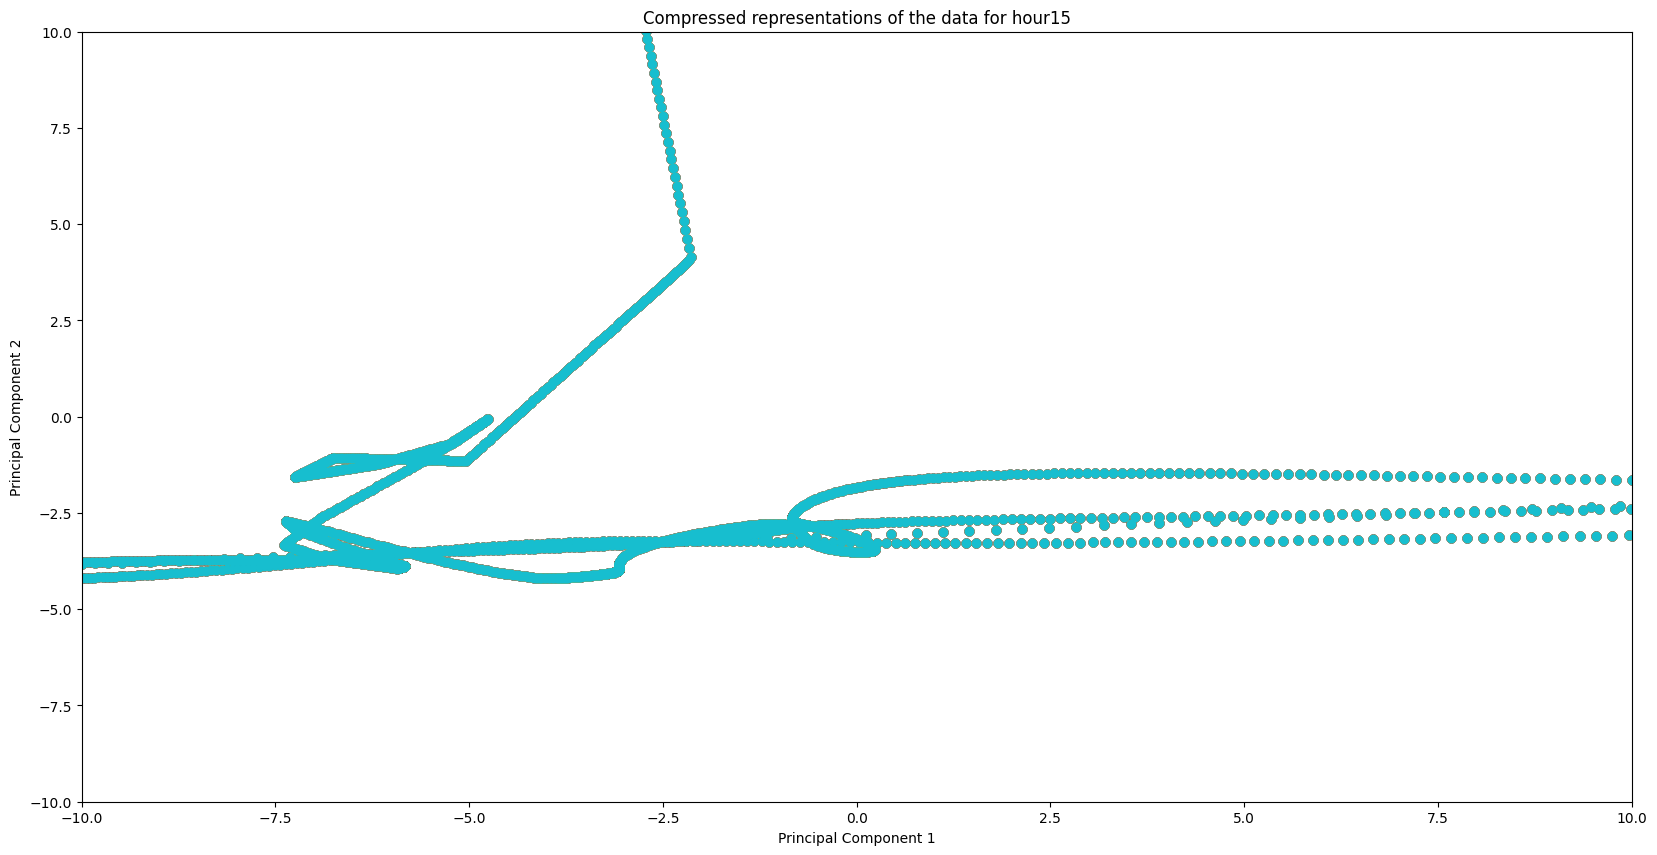

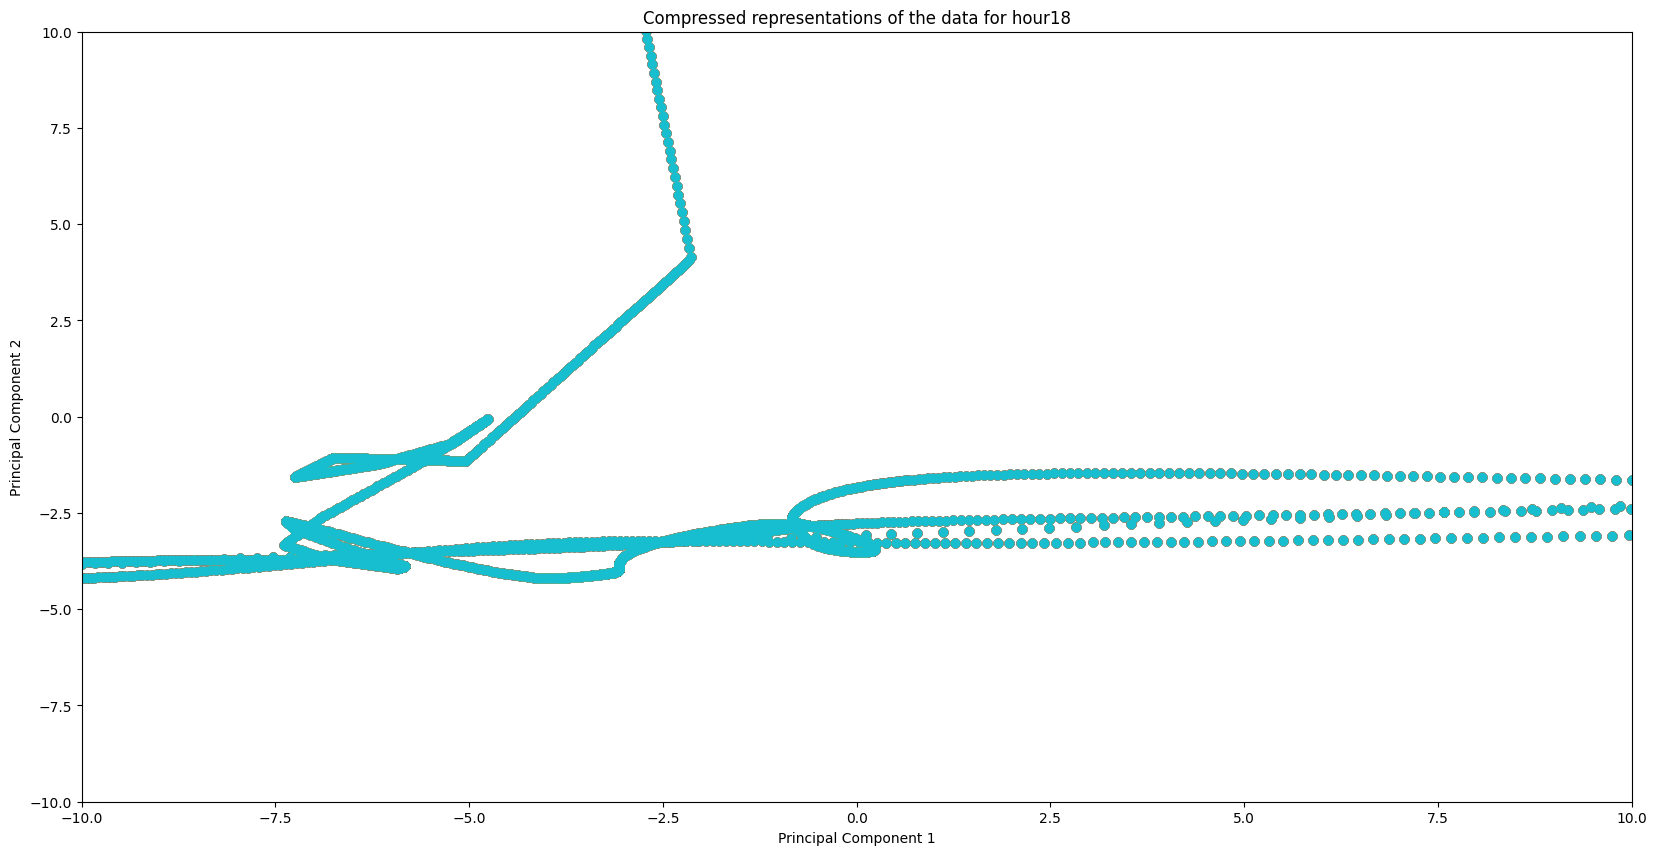

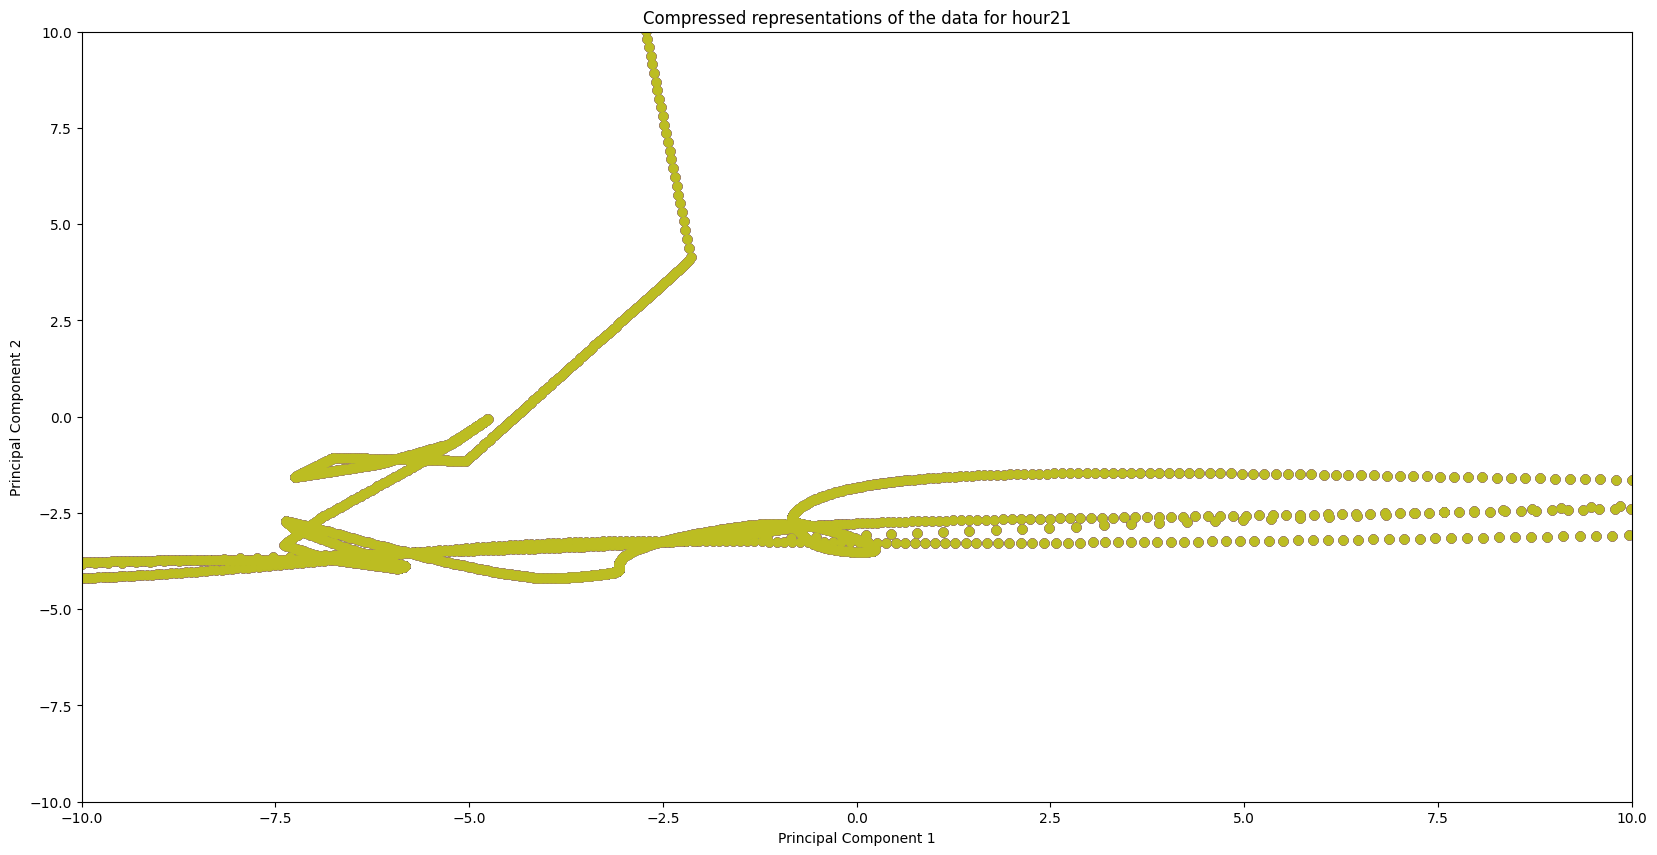

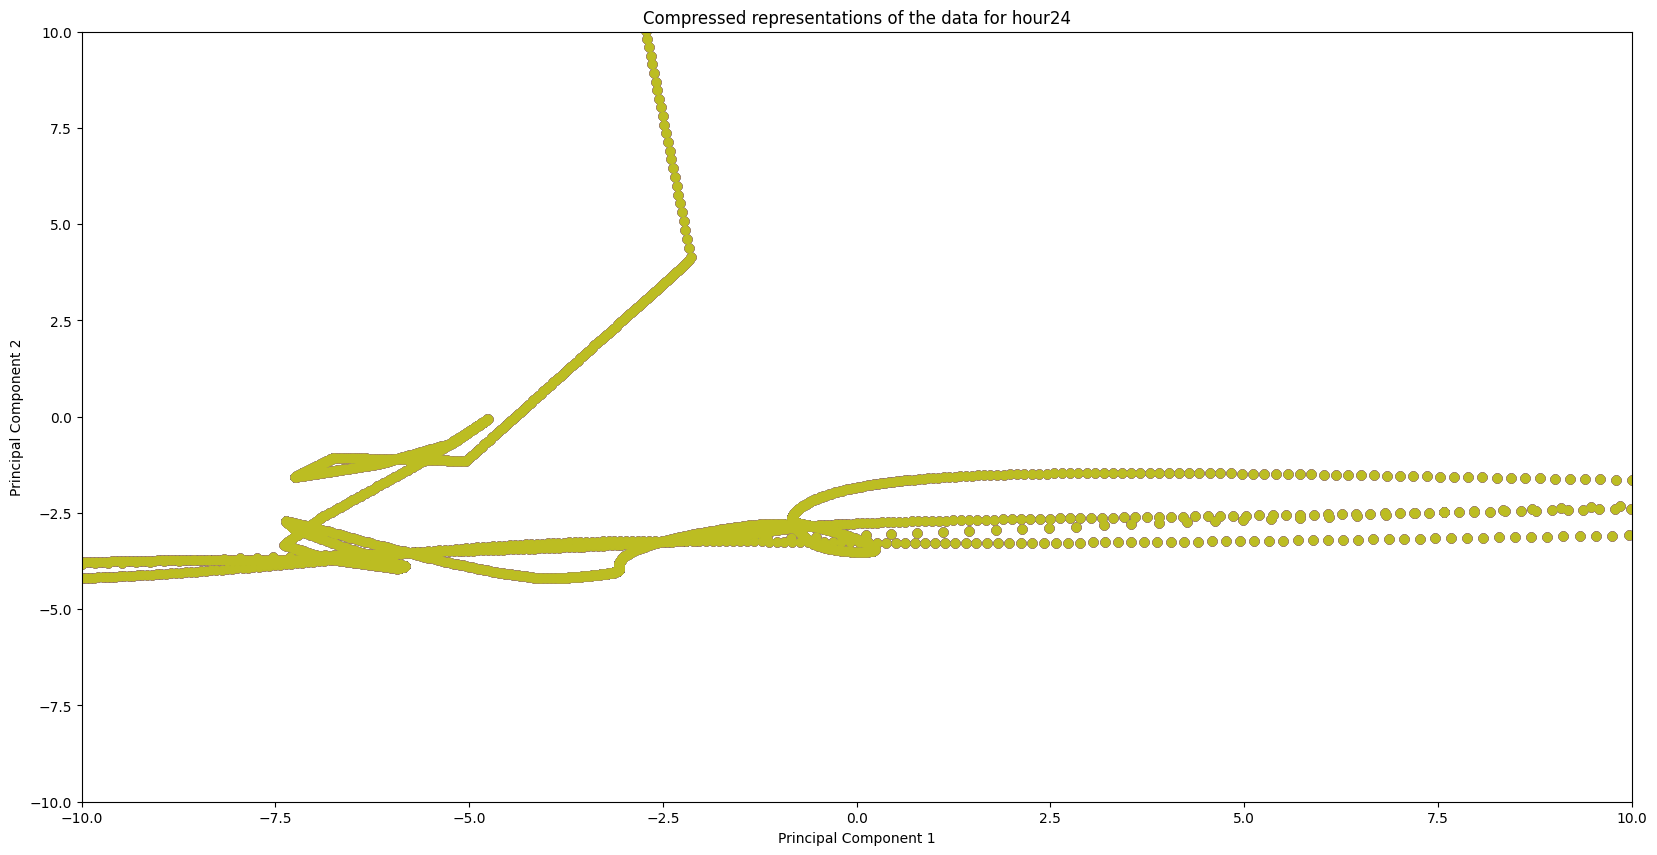

In [13]:
#Autoencoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Standardize the data
scaler = StandardScaler()
data = []
for hour in hours:
    for column in hour.columns[1:]:
        data.append(hour[column])
data = np.array(data)
data = data.transpose()
data = scaler.fit_transform(data)

#Check the data
print(data)

#Apply PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

#Plot the compressed representations
i = 3
for hour in hours:
    plt.figure(figsize = (20, 10))
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    for column in hour.columns[1:]:
        plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Compressed representations of the data for hour' + str(i))
    plt.show
    i += 3

In [100]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Auto Encoder
scaler = MinMaxScaler()
hour3_copy = hour3.copy()
#df_scaled = scaler.fit_transform(hour3_copy)
df_scaled = hour3_copy

train_data, test_data = train_test_split(df_scaled, train_size=0.8)

train_data = torch.tensor(np.array(train_data), dtype=torch.float32)
test_data = torch.tensor(np.array(test_data), dtype=torch.float32)

In [101]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, latent_dim)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [102]:
input_dimensions = df_scaled.shape[1]
latent_dimensions = 7

model = Autoencoder(input_dim = input_dimensions, latent_dim= latent_dimensions)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 20
batch_size = 16

for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(train_data.size()[0])
        
    for i in range(0, train_data.size()[0], batch_size):
        optimizer.zero_grad()
            
        indices = permutation[i:i+batch_size]
        batch_x = train_data[indices]
            
        outputs = model(batch_x)
        loss = criterion(outputs, batch_x)
            
        loss.backward()
        optimizer.step()
        
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/20], Loss: 3.6843
Epoch [2/20], Loss: 4.1641
Epoch [3/20], Loss: 3.3953
Epoch [4/20], Loss: 1.9503
Epoch [5/20], Loss: 3.6059
Epoch [6/20], Loss: 6.4983
Epoch [7/20], Loss: 0.7624
Epoch [8/20], Loss: 2.7133
Epoch [9/20], Loss: 4.9663
Epoch [10/20], Loss: 1.8239
Epoch [11/20], Loss: 1.9075
Epoch [12/20], Loss: 5.5149
Epoch [13/20], Loss: 8.2832
Epoch [14/20], Loss: 2.7766
Epoch [15/20], Loss: 2.7930
Epoch [16/20], Loss: 3.3564
Epoch [17/20], Loss: 0.7102
Epoch [18/20], Loss: 1.4823
Epoch [19/20], Loss: 4.3596
Epoch [20/20], Loss: 2.3463


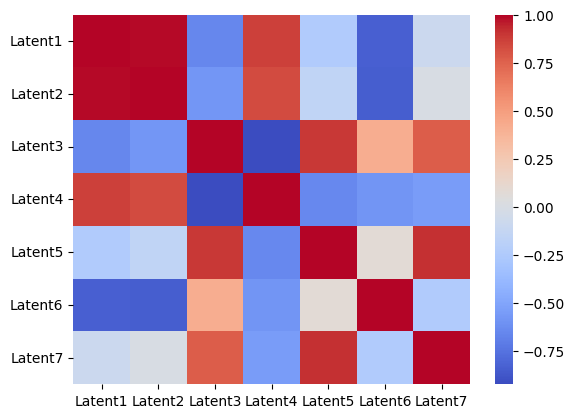

In [104]:
model.eval()
with torch.no_grad():
    latent_features = model.encoder(torch.tensor(np.array(df_scaled), dtype=torch.float32)).numpy()
latent_df = pd.DataFrame(latent_features, columns=['Latent1', 'Latent2', 'Latent3', 'Latent4', 'Latent5', 'Latent6', 'Latent7'])

corr_matrix = latent_df.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f')
plt.show()

In [95]:
latent_df

Latent1   Latent2   Latent3   Latent4   Latent5   Latent6   Latent7
0    -0.518308  4.700049  4.872100 -1.309582  0.835499 -1.485744  0.277462
1    -0.514438  4.710052  4.878603 -1.311673  0.842538 -1.481705  0.268721
2    -0.510559  4.720078  4.885118 -1.313767  0.849592 -1.477657  0.259959
3    -0.506670  4.730129  4.891651 -1.315868  0.856664 -1.473599  0.251176
4    -0.502771  4.740201  4.898200 -1.317972  0.863752 -1.469532  0.242372
...        ...       ...       ...       ...       ...       ...       ...
3572 -1.245507 -0.027975  0.142486  0.614750 -1.399991 -1.502379  0.518250
3573 -1.245393 -0.031921  0.137674  0.614457 -1.401725 -1.500237  0.516905
3574 -1.245179 -0.035999  0.132779  0.614305 -1.403389 -1.498106  0.515525
3575 -1.245057 -0.039968  0.127560  0.614159 -1.405203 -1.496520  0.514771
3576 -1.244853 -0.044059  0.122252  0.614124 -1.406978 -1.494972  0.514056

[3577 rows x 7 columns]

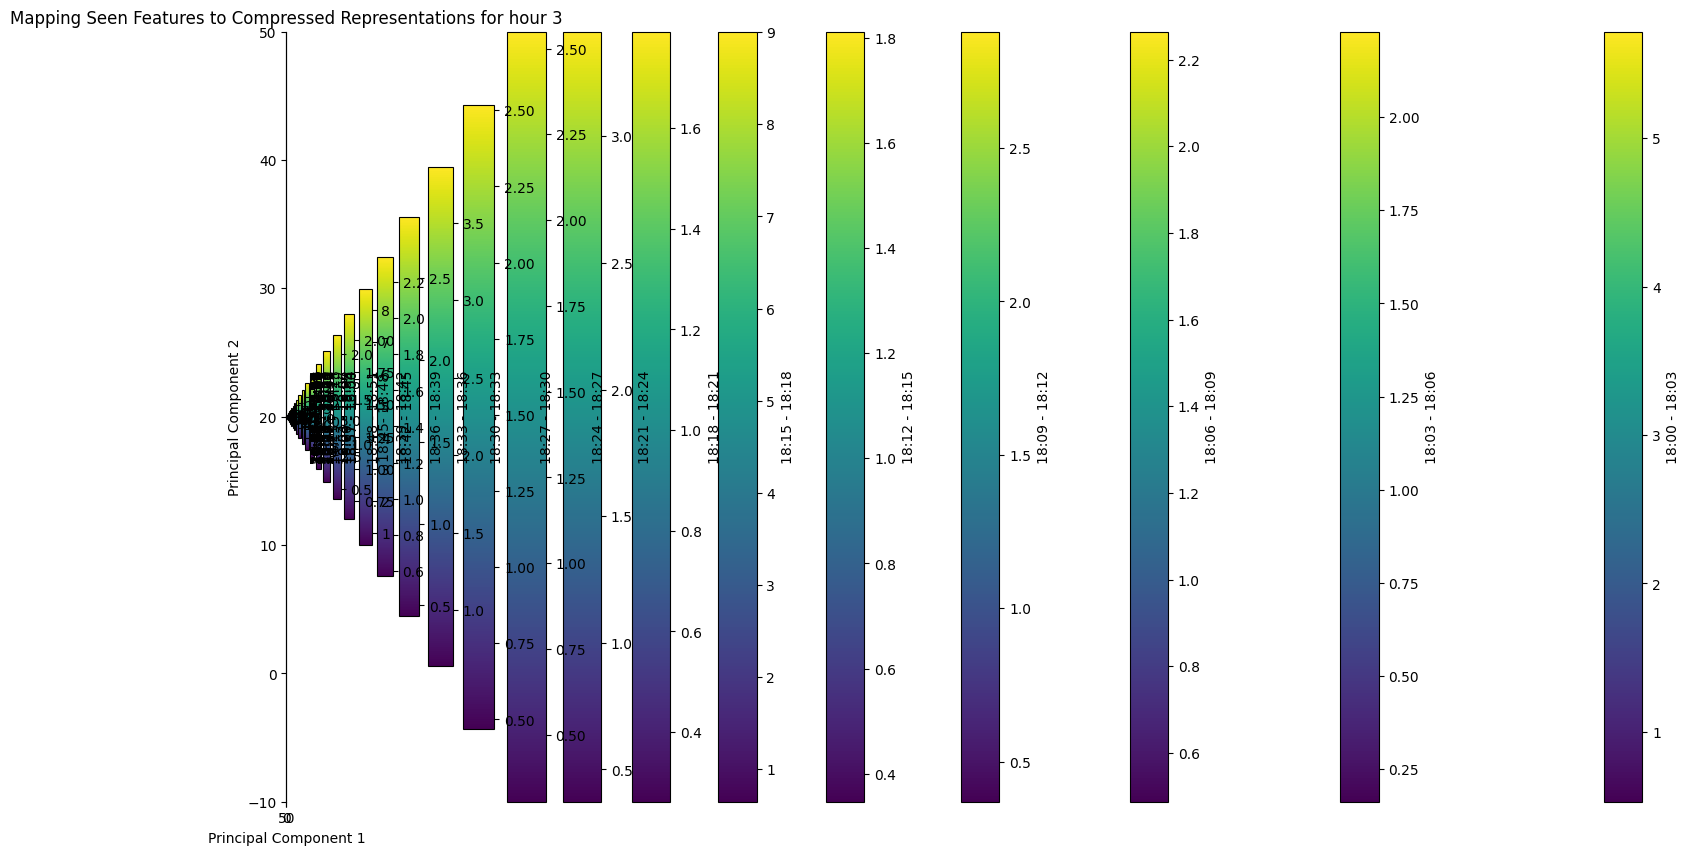

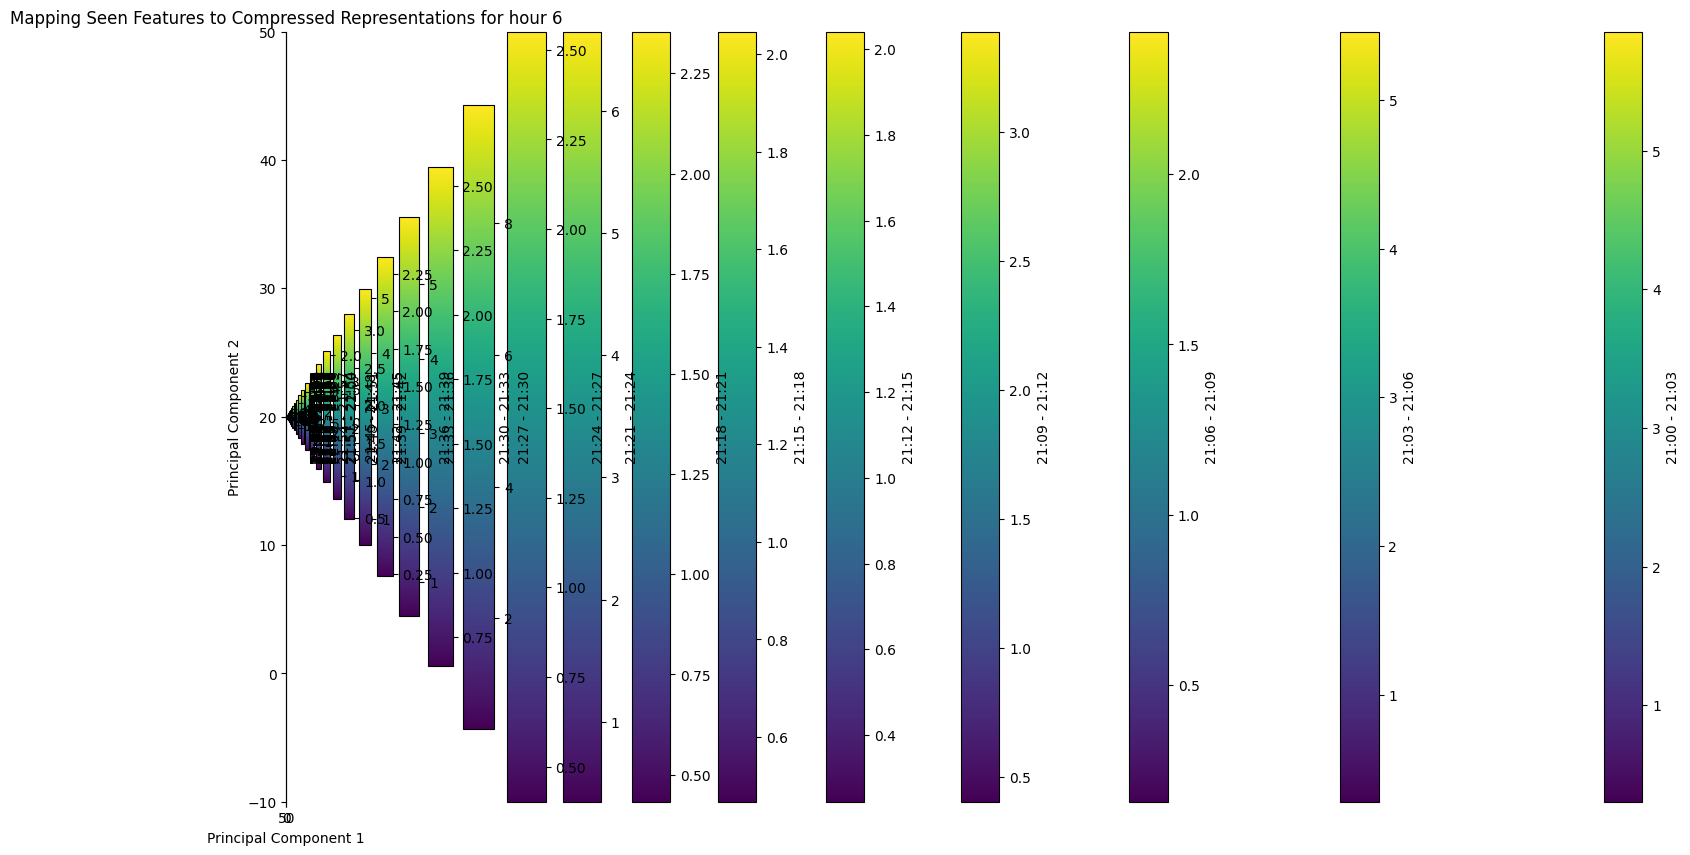

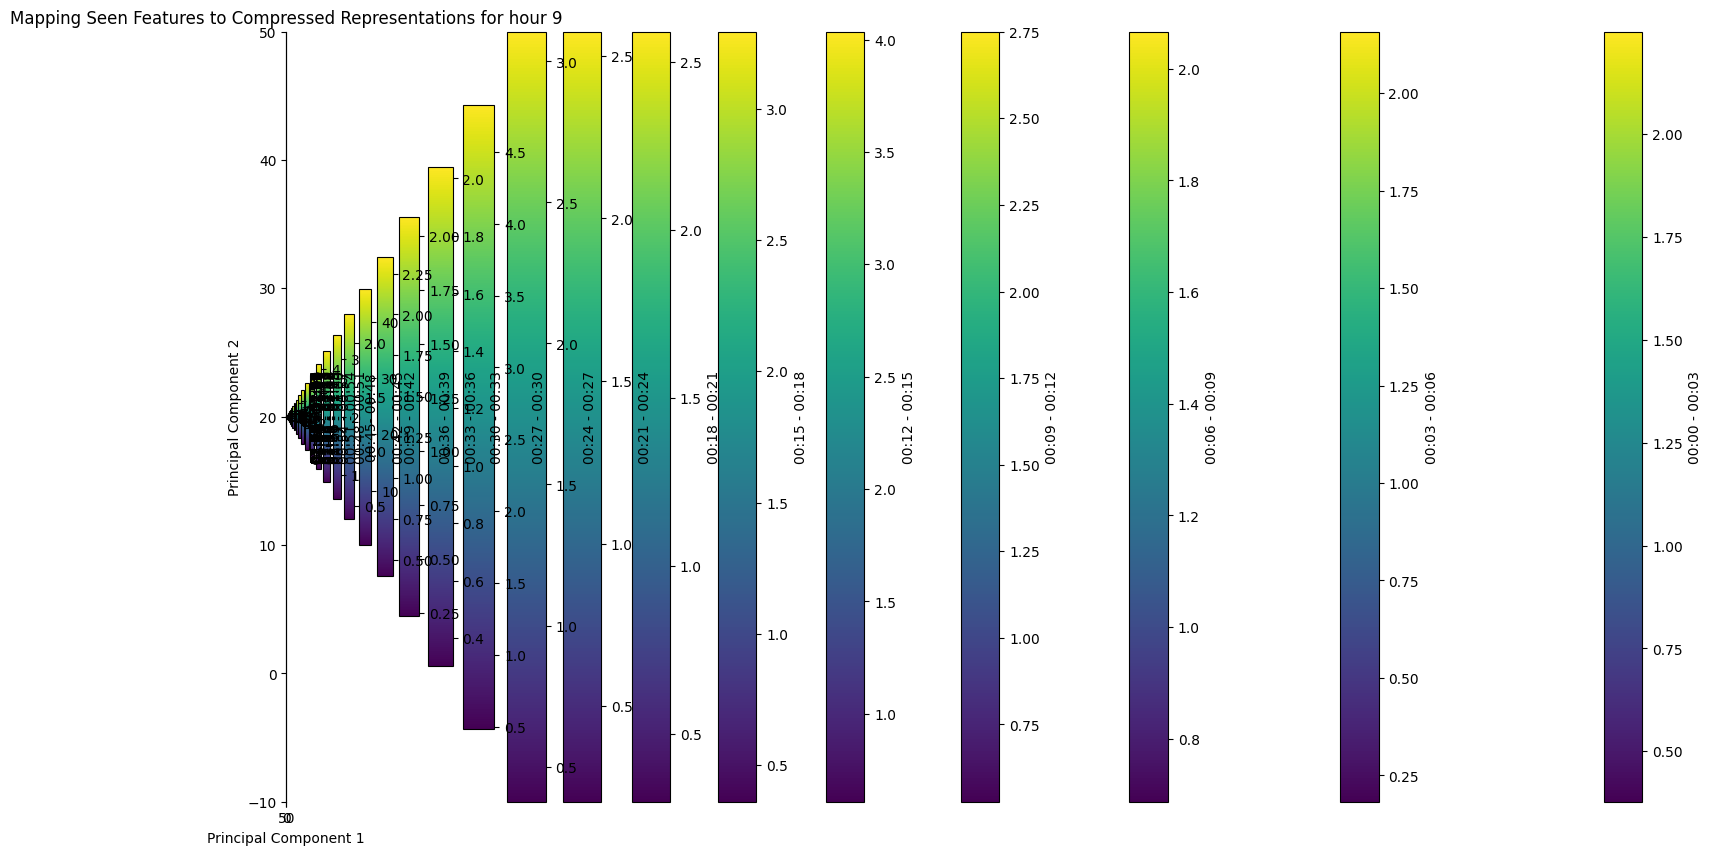

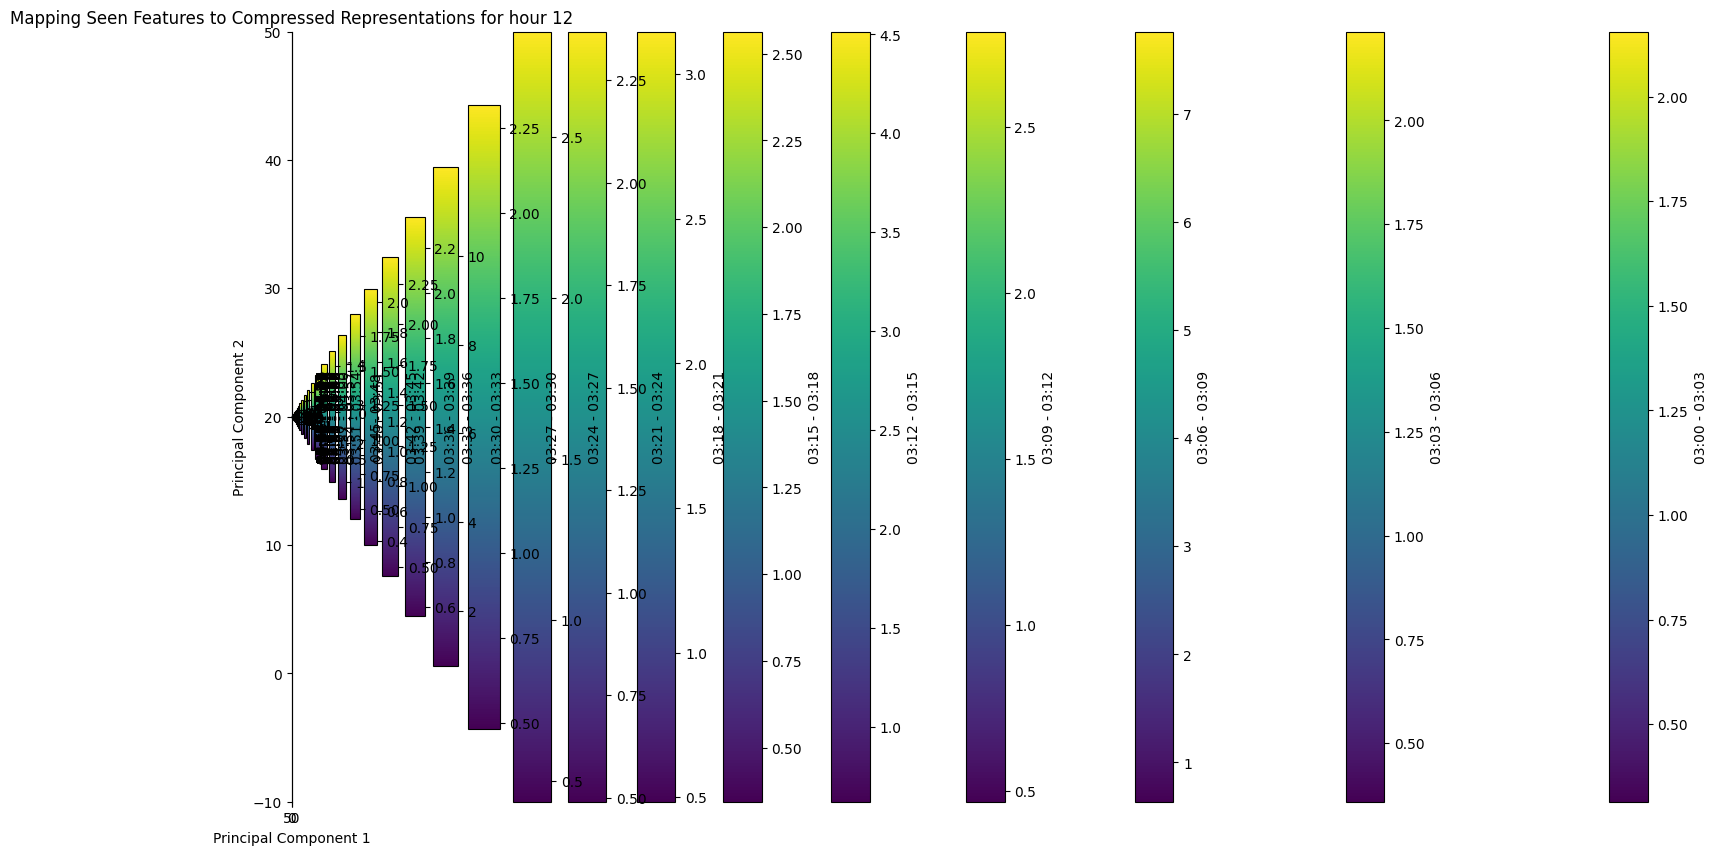

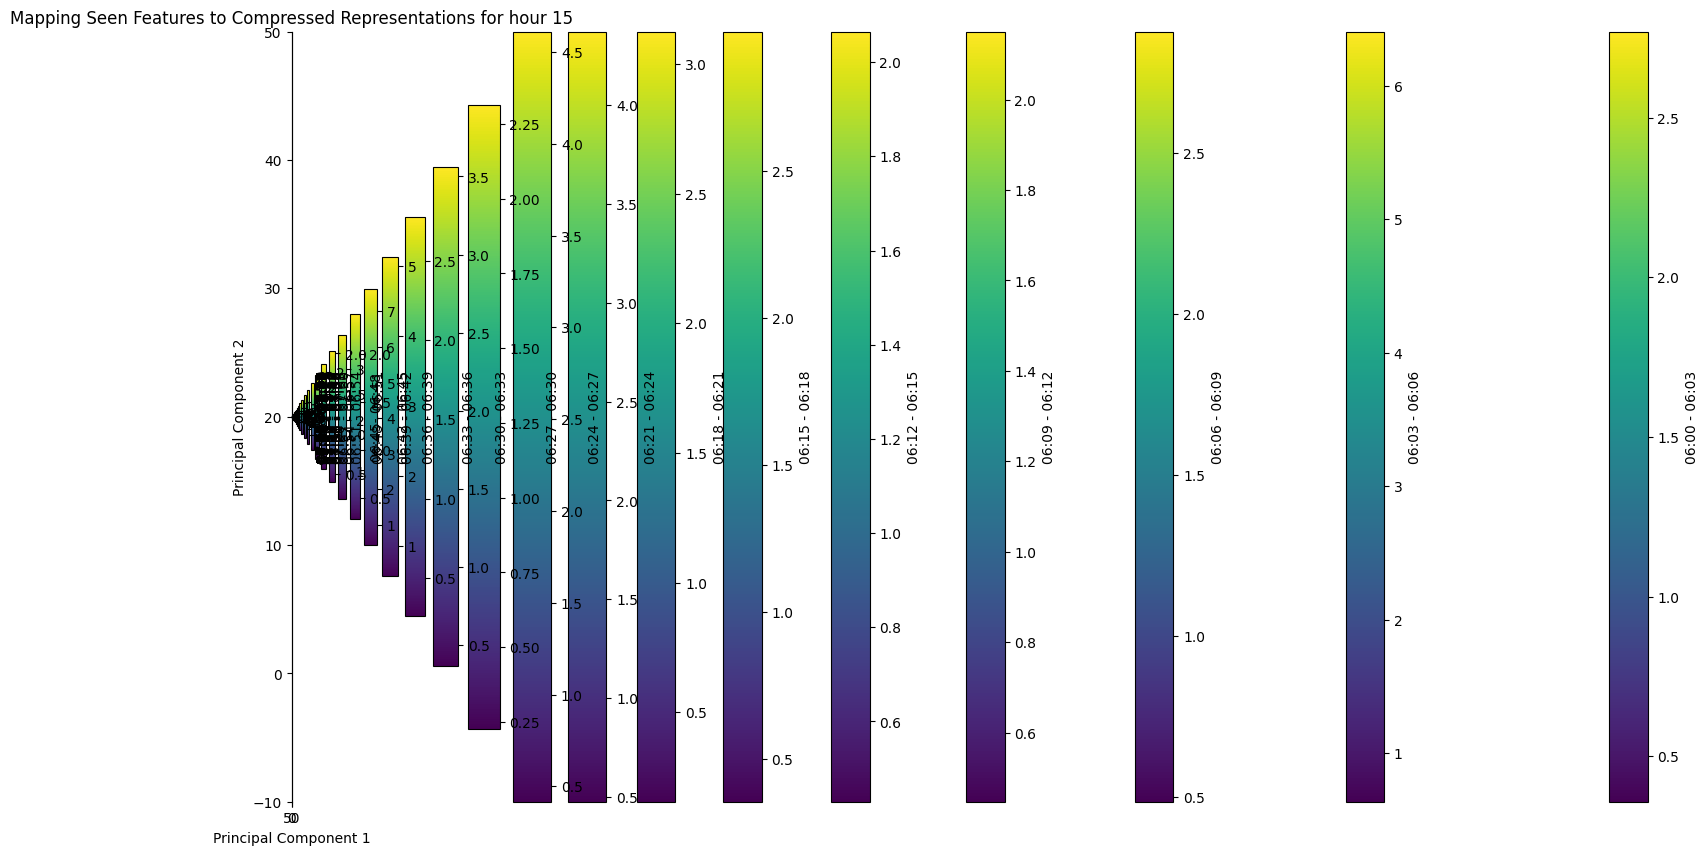

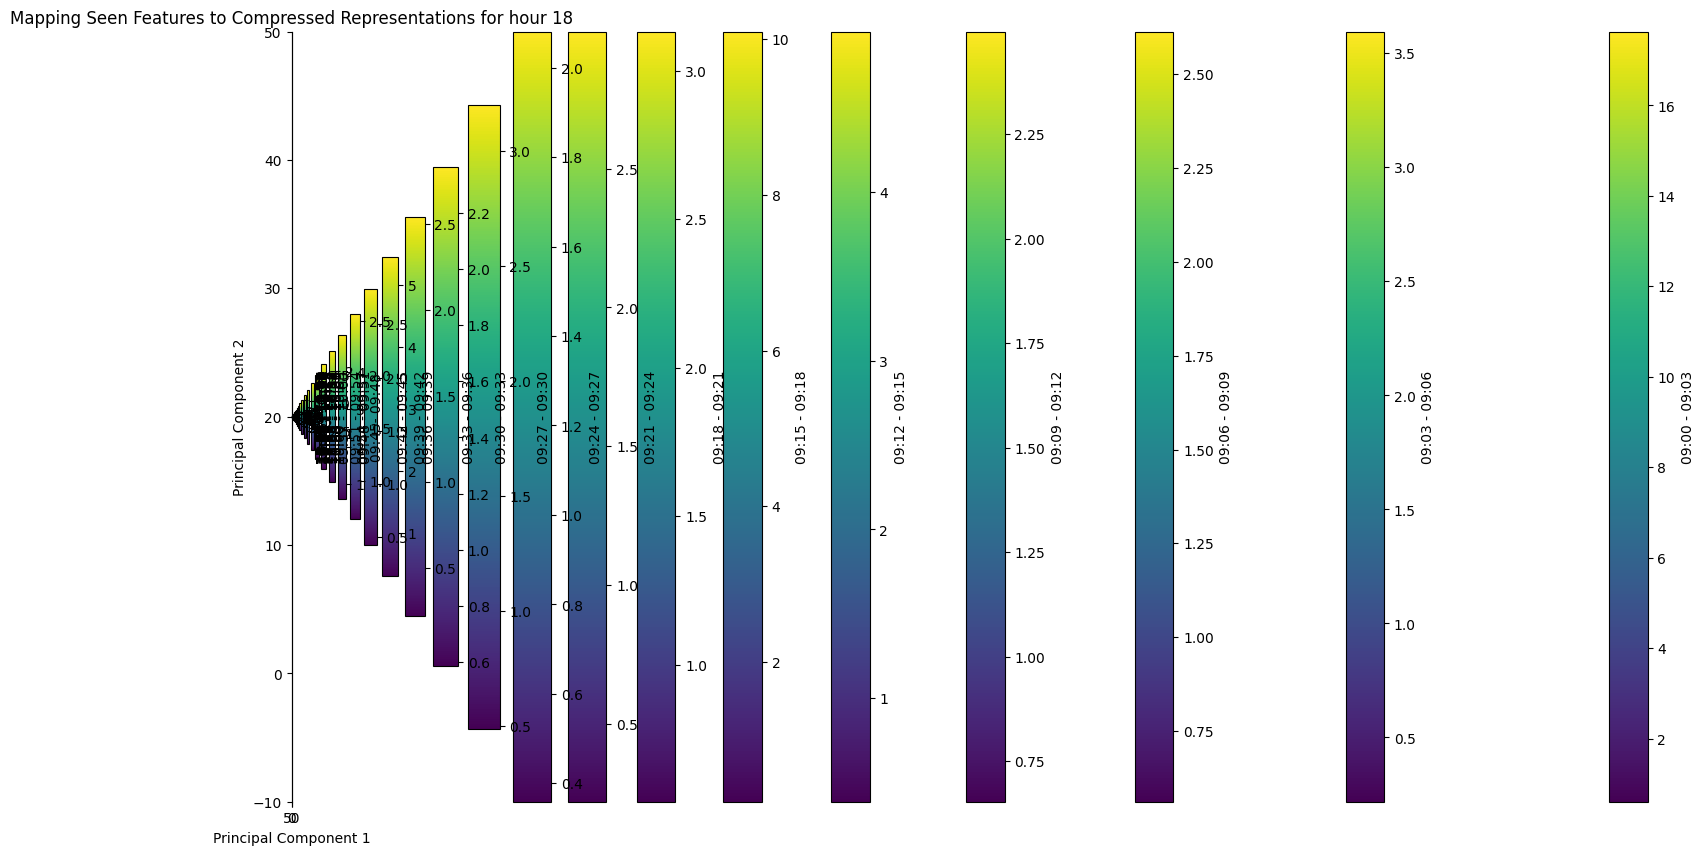

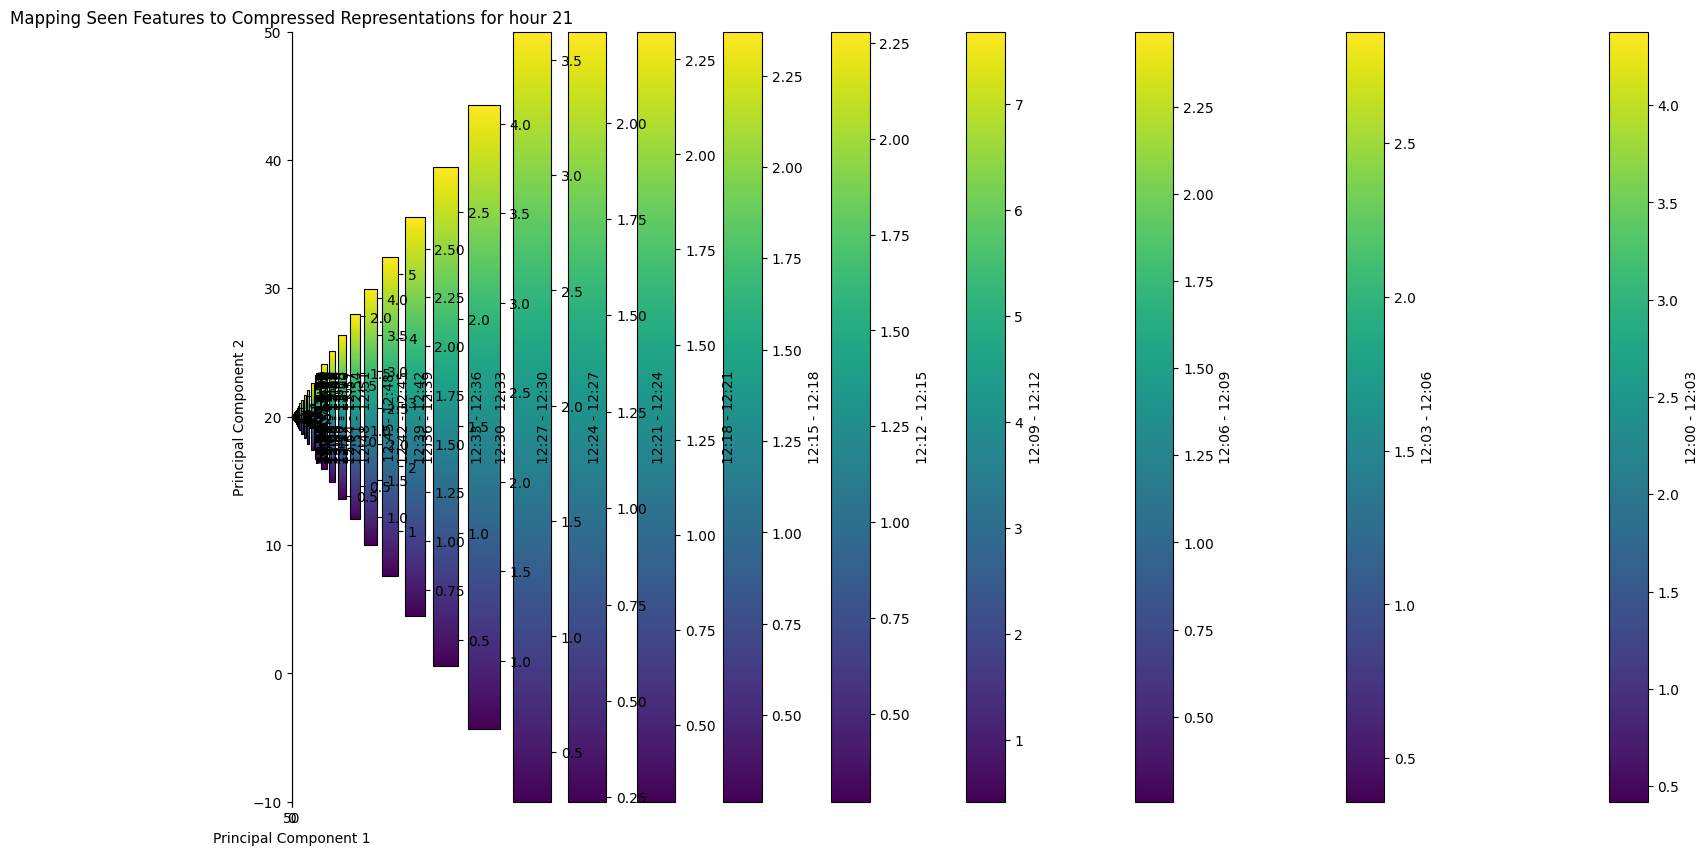

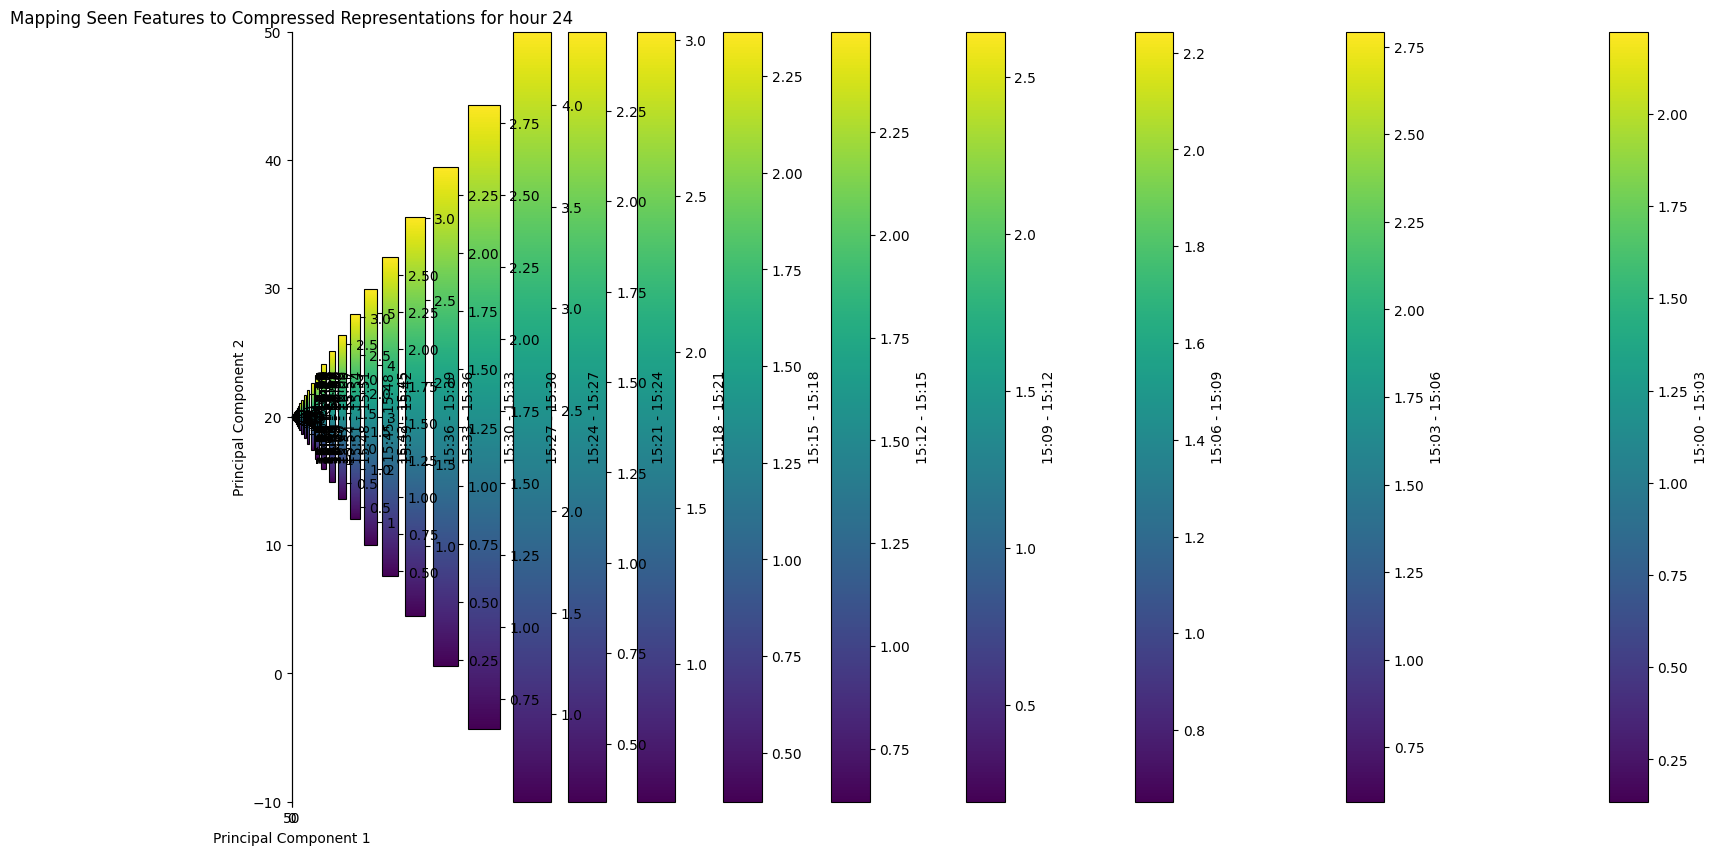

In [15]:
# Map the seen features to the unseen features
i = 3
for hour in hours:
    plt.figure(figsize=(20, 10))
    plt.xlim(-10, 50)
    plt.ylim(-10, 50)
    for column in hour.columns[1:]:
        plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=hour[column], cmap='viridis')
        plt.colorbar(label=column)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Mapping Seen Features to Compressed Representations for hour ' + str(i))
    plt.show()
    i += 3

In [17]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import root_mean_squared_error
from sklearn.pipeline import Pipeline

# Simple Linear Regression Model (Consider Ridge or Lasso Regression for overfitting)
pipeline = Pipeline([
    ('scale', MinMaxScaler()),
    ('linear', LinearRegression())
])

#pipeline.fit(x_train, y_test)
#predictions = pipeline.predict(x_train)

#error = root_mean_squared_error(y_train, predictions)

#plt.plot(y_train, predictions, color = 'green')

In [18]:
# Simple Regression Model (Consider Ridge or Lasso Regression for overfitting)
pipeline = Pipeline([
    ('scale', MinMaxScaler()),
    ('polynomial', PolynomialFeatures(degree = 3, include_bias = True))
])

#pipeline.fit(x_train, y_test)
#predictions = pipeline.predict(x_train)

#error = root_mean_squared_error(y_train, predictions)

#plt.plot(y_train, predictions, color = 'purple')